<a href="https://colab.research.google.com/github/julvad/landscape_beehives_mtl/blob/main/glmm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Landscape composition as an environmental driver of urban beehives' health**

https://docs.google.com/document/d/1osorKvxebfbiVXsn6-T2MkHRINcYoRfRXQ_lYNYnQaQ/edit?usp=sharing

> Julien Vadnais; j.vadnais@umontreal.ca



#Plugins et Drive Mount

## Conda install pymer4

In [1]:
pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.3 which is incompatible.
notebook 6.5.5 requires pyzmq<25,>=17, but you have pyzmq 25.1.2 which is incompatible.


In [1]:
!pip install -q condacolab

In [2]:
import condacolab
condacolab.install()



⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:11
🔁 Restarting kernel...


In [1]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
%%capture
!conda install -c ejolly -c defaults -c conda-forge pymer4

In [3]:
# pip install --upgrade ipykernel

In [4]:
!pip install rpy2==3.5.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.0/212.0 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rpy2: filename=rpy2-3.5.6-cp310-cp310-linux_x86_64.whl size=256932 sha256=0f59ba19db46bff06e067e22e1f284905b9cda26b7faed4b66725ef6a0b49664
  Stored in directory: /root/.cache/pip/wheels/a2/6c/1a/28fbb986f9b0d67e58577f908a1addc4bfc7a30a5a25db3d78
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.11
    Uninstalling rpy2-3.5.11:
      Successfully uninstalled rpy2-3.5.11


In [5]:
import rpy2
print(rpy2.__version__)

3.5.6


In [6]:
pip install matrix

In [7]:
import matrix
import pymer4
from pymer4.models import Lmer

During startup - Warning messages:
1: package ‘methods’ was built under R version 4.3.3 
2: package ‘datasets’ was built under R version 4.3.3 
3: package ‘utils’ was built under R version 4.3.3 
4: package ‘grDevices’ was built under R version 4.3.3 
5: package ‘graphics’ was built under R version 4.3.3 
6: package ‘stats’ was built under R version 4.3.3 


In [8]:
!python -c "from pymer4.test_install import test_install; test_install()"

During startup - Warning messages:
1: package ‘methods’ was built under R version 4.3.3 
2: package ‘datasets’ was built under R version 4.3.3 
3: package ‘utils’ was built under R version 4.3.3 
4: package ‘grDevices’ was built under R version 4.3.3 
5: package ‘graphics’ was built under R version 4.3.3 
6: package ‘stats’ was built under R version 4.3.3 
Pymer4 installation working successfully!


In [9]:
#Plugins et extensions

# Pandas
import pandas as pd

# Numpy
import numpy as np

# Math
import math

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# Folium if need for interactive mapping
# !pip install folium
import folium

# Geopandas
# !pip install geopandas
import geopandas as gpd

# Kmeans clustering
from sklearn.cluster import KMeans

In [10]:
from scipy.optimize import minimize
from scipy import sparse
import statsmodels.base.model as base
from statsmodels.iolib import summary2
from statsmodels.genmod import families
import warnings
import patsy

## drive mount

In [11]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


#Data initialisation and processing

In [12]:
div = 0

## Data initialisation

**Data required**:
colab folder, Google Drive


###**nectar**

In [13]:
nec = gpd.read_file('/content/drive/MyDrive/colab/nec.geojson')
nec

,OBJECTID,tag_serial_number,fob,fobr,grade,varroa,report_submitted_at,report_submitted_by,hive_identity_id,category,...,operation_id,is_alive,queen_variant,queen_status,state_province_long,country_long,city,yard_type,crop_type,geometry
0,1363,258605,None,None,Medium,None,2022-06-02 17:04:09,Evan Henry,67472,None,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
1,1364,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive grading,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
2,1365,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive status,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
3,1366,258605,None,None,Weak,None,2022-06-20 20:48:26,Théo Geiller,67472,hive grading,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
4,1367,258605,None,None,Medium,None,2022-07-04 21:50:46,Evan Henry,67472,hive grading,...,83,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,10036,277057,03.5,06.50,Medium,None,2022-08-14 19:04:29,Nico Coallier,73018,treatment,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)
867,10037,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,hive issues,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)
868,10038,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,frames of brood,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)
869,10039,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,hive grading,...,159,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329)


In [14]:
# lignes de proximité aux grandes routes
nec_r = gpd.read_file('/content/drive/MyDrive/colab/nec_r.geojson')
nec_r.head()

,OBJECTID,tag_serial_number,fob,fobr,grade,varroa,report_submitted_at,report_submitted_by,hive_identity_id,category,...,DIR_VOIE,NOM_VOIE,DEB_DRT,FIN_DRT,ARR_DRT,LIM_GCH,LIM_DRT,POSITION,distance,geometry
0,1363,258605,None,None,Medium,None,2022-06-02 17:04:09,Evan Henry,67472,None,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
1,1364,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive grading,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
2,1365,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive status,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
3,1366,258605,None,None,Weak,None,2022-06-20 20:48:26,Théo Geiller,67472,hive grading,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."
4,1367,258605,None,None,Medium,None,2022-07-04 21:50:46,Evan Henry,67472,hive grading,...,None,Van Horne,1001,1049,Outremont,Montréal,Montréal,5,88.745018,"MULTILINESTRING ((608381.193 5042219.698, 6084..."


In [15]:
# Landscape composition
nec50 = pd.read_csv('/content/drive/MyDrive/colab/nec50.csv', delimiter=';')
nec250 = pd.read_csv('/content/drive/MyDrive/colab/nec250.csv', delimiter=';')
nec1000 = pd.read_csv('/content/drive/MyDrive/colab/nec1000.csv', delimiter=';')
nec2500 = pd.read_csv('/content/drive/MyDrive/colab/nec2500.csv', delimiter=';')

###**alveole**

In [16]:
alv = gpd.read_file('/content/drive/MyDrive/colab/alv.geojson')
alv

,OBJECTID,ColonyID,HiveID,ClientID,Year,Status,Place,Lat,Lng,Cause_of_death,...,NDVI_20_50,NDVI_50_100,HvCnt,HvCnt_Cat,Status_Binary,MedInc_Qrt,Water_Bi,Hghwy_len_Binary,Year_Cat,geometry
0,1,40.1_0,40.1,40,2017,Dead,Roof,45.509611,-73.568117,Virgin queen,...,0.164774,0.000873,10,<10,0,1,0,1,2017,POINT (611849.238 5040561.356)
1,2,40.1_0,40.1,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.164774,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356)
2,3,40.2_0,40.2,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.164774,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356)
3,4,40.1_1,40.1,40,2019,Healthy,Roof,45.509611,-73.568117,Unknown,...,0.164774,0.000873,67,<75,1,1,0,1,2019,POINT (611849.238 5040561.356)
4,5,40.2_0,40.2,40,2019,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.164774,0.000873,67,<75,0,1,0,1,2019,POINT (611849.238 5040561.356)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2226,200.2_2,200.2,200,2020,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.704870,0.181977,7,<10,1,4,0,0,2020,POINT (609324.652 5038559.075)
2226,2227,200.1_2,200.1,200,2021,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.704870,0.181977,5,<5,1,4,0,0,2021,POINT (609324.652 5038559.075)
2227,2228,200.2_2,200.2,200,2021,Dead,Roof,45.491994,-73.600873,Undiagnosed,...,0.704870,0.181977,5,<5,0,4,0,0,2021,POINT (609324.652 5038559.075)
2228,2229,200.1_2,200.1,200,2022,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.704870,0.181977,4,<5,1,4,0,0,2022,POINT (609324.652 5038559.075)


In [17]:
# gdf with distance to major road
alv_r = gpd.read_file('/content/drive/MyDrive/colab/alv_r.geojson')
alv_r.head()

,OBJECTID,ColonyID,HiveID,ClientID,Year,Status,Place,Lat,Lng,Cause_of_death,...,DIR_VOIE,NOM_VOIE,DEB_DRT,FIN_DRT,ARR_DRT,LIM_GCH,LIM_DRT,POSITION,distance,geometry
0,1,40.1_0,40.1,40,2017,Dead,Roof,45.509611,-73.568117,Virgin queen,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
1,2,40.1_0,40.1,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
2,3,40.2_0,40.2,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
3,4,40.1_1,40.1,40,2019,Healthy,Roof,45.509611,-73.568117,Unknown,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."
4,5,40.2_0,40.2,40,2019,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,Ouest,De Maisonneuve,137,139,Ville-Marie,Montréal,Montréal,5,49.216573,"MULTILINESTRING ((611849.238 5040561.356, 6118..."


###**polliflora**

In [18]:
# gdf with distance to major road
pol = gpd.read_file('/content/drive/MyDrive/colab/pol.geojson')
pol

,FID,globalid,CreationDa,Creator,EditDate,Editor,_date,nom_du_ruc,id_de_la_r,pr_sence_d,...,_tat_de_ot,nombre_de_,nombre_de1,nombre_d_1,field_16,field_16_o,question_l,HubName,HubDist,geometry
0,0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,MIL,1,Non,...,,0,2,,6,,,7,305.607064,POINT (608025.146 5042285.541)
1,1,a762305a-9c32-4548-a046-b92777438b45,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,1,Non,...,,0,6,,8,,,7,353.559891,POINT (603828.975 5041101.363)
2,2,5241ca79-30a8-4f36-9452-1513976be8fe,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,2,Non,...,,0,6,,9,,,7,464.331875,POINT (603822.536 5041090.273)
3,3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,1,Oui,...,,0,6,,4,,,7,471.132554,POINT (604871.385 5038088.144)
4,4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,2,Oui,...,,0,4,,3,,,7,228.209512,POINT (604872.253 5038101.155)
5,5,63a48082-b319-4fc4-96e3-2da59644b62f,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,3,Non,...,,0,9,,4,,,7,228.209512,POINT (604872.253 5038101.155)
6,6,9947b5ae-439d-440d-b266-daf2a0b262b1,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1694131200000,MIL,2,Non,...,,4,3,,4,,,7,302.992878,POINT (608020.497 5042283.267)
7,7,00529ae9-2c5a-4b77-a850-435c50dec627,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,MIL,3,Non,...,,0,6,,2,,,7,85.833226,POINT (608026.052 5042280.994)
8,8,92e20424-f867-403e-9b04-dd1224a00596,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,1,Non,...,,0,5,,5,,,7,83.139168,POINT (607994.084 5045891.615)
9,9,f4784807-d761-45b2-a19c-b6474b176619,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,2,Non,...,,0,1,,3,,,7,84.475123,POINT (607990.866 5045888.343)


In [19]:
# gdf with distance to major road
pol_r = gpd.read_file('/content/drive/MyDrive/colab/pol_r.geojson')
pol_r

,FID,globalid,CreationDa,Creator,EditDate,Editor,_date,nom_du_ruc,id_de_la_r,pr_sence_d,...,DIR_VOIE,NOM_VOIE,DEB_DRT,FIN_DRT,ARR_DRT,LIM_GCH,LIM_DRT,POSITION,distance,geometry
0,0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,MIL,1,Non,...,None,Parc,0,0,Rosemont-La Petite-Patrie,Montréal,Montréal,5,267.436618,"MULTILINESTRING ((608025.146 5042285.541, 6081..."
1,1,a762305a-9c32-4548-a046-b92777438b45,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,1,Non,...,None,Sainte-Croix,601,807,Saint-Laurent,Montréal,Montréal,5,437.020646,"MULTILINESTRING ((603828.975 5041101.363, 6035..."
2,2,5241ca79-30a8-4f36-9452-1513976be8fe,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,CSL,2,Non,...,None,Sainte-Croix,601,807,Saint-Laurent,Montréal,Montréal,5,424.442927,"MULTILINESTRING ((603822.536 5041090.273, 6035..."
3,3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,1,Oui,...,None,Décarie,0,0,Côte-des-Neiges-Notre-Dame-de-Grâce,Montréal,Montréal,5,716.467034,"MULTILINESTRING ((604871.385 5038088.144, 6052..."
4,4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,2,Oui,...,None,Décarie,0,0,Côte-des-Neiges-Notre-Dame-de-Grâce,Montréal,Montréal,5,705.478859,"MULTILINESTRING ((604872.253 5038101.155, 6052..."
5,5,63a48082-b319-4fc4-96e3-2da59644b62f,1694131200000,vadnaiju_udem,1694131200000,vadnaiju_udem,1694131200000,Hippo,3,Non,...,None,Décarie,0,0,Côte-des-Neiges-Notre-Dame-de-Grâce,Montréal,Montréal,5,705.478859,"MULTILINESTRING ((604872.253 5038101.155, 6052..."
6,6,9947b5ae-439d-440d-b266-daf2a0b262b1,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1694131200000,MIL,2,Non,...,None,Parc,0,0,Rosemont-La Petite-Patrie,Montréal,Montréal,5,272.090059,"MULTILINESTRING ((608020.497 5042283.267, 6081..."
7,7,00529ae9-2c5a-4b77-a850-435c50dec627,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,MIL,3,Non,...,None,Parc,0,0,Rosemont-La Petite-Patrie,Montréal,Montréal,5,270.501159,"MULTILINESTRING ((608026.052 5042280.994, 6081..."
8,8,92e20424-f867-403e-9b04-dd1224a00596,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,1,Non,...,Est,Crémazie,0,0,Villeray-Saint-Michel-Parc-Extension,Montréal,Montréal,5,76.242192,"MULTILINESTRING ((607994.084 5045891.615, 6080..."
9,9,f4784807-d761-45b2-a19c-b6474b176619,1695340800000,vadnaiju_udem,1695340800000,vadnaiju_udem,1695340800000,Tohu,2,Non,...,Est,Crémazie,0,0,Villeray-Saint-Michel-Parc-Extension,Montréal,Montréal,5,75.693920,"MULTILINESTRING ((607990.866 5045888.343, 6080..."


## Data processing

### distance merge

In [20]:
# Distance to nearest main road gdf
# simplify and merge distance with main gdf
alv_r = alv_r.drop_duplicates(subset='HiveID', keep='first')
alv_r['distance'].nunique()
alv = pd.merge(alv, alv_r[['HiveID', 'distance']], on='HiveID', how='left')

In [21]:
# Distance to nearest main road gdf
# merge distance
pol = pd.merge(pol, pol_r[['globalid', 'distance']], on='globalid', how='left')

In [22]:
# Distance to nearest main road gdf
# merge distance
nec = pd.merge(nec, nec_r[['OBJECTID', 'distance']], on='OBJECTID', how='left')

fix = nec['distance'] > 4000

# Set the 'distance' values in the filtered rows to 40
nec.loc[fix, 'distance'] = 40

nec

,OBJECTID,tag_serial_number,fob,fobr,grade,varroa,report_submitted_at,report_submitted_by,hive_identity_id,category,...,is_alive,queen_variant,queen_status,state_province_long,country_long,city,yard_type,crop_type,geometry,distance
0,1363,258605,None,None,Medium,None,2022-06-02 17:04:09,Evan Henry,67472,None,...,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698),88.745018
1,1364,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive grading,...,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698),88.745018
2,1365,258605,None,None,Medium,None,2022-06-02 17:20:39,Evan Henry,67472,hive status,...,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698),88.745018
3,1366,258605,None,None,Weak,None,2022-06-20 20:48:26,Théo Geiller,67472,hive grading,...,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698),88.745018
4,1367,258605,None,None,Medium,None,2022-07-04 21:50:46,Evan Henry,67472,hive grading,...,1,None,None,None,None,None,honey,Urban flowers,POINT (608381.193 5042219.698),88.745018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,10036,277057,03.5,06.50,Medium,None,2022-08-14 19:04:29,Nico Coallier,73018,treatment,...,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329),175.026401
867,10037,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,hive issues,...,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329),175.026401
868,10038,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,frames of brood,...,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329),175.026401
869,10039,277057,03.5,02.00,Weak,None,2022-08-30 16:13:23,Nico Coallier,73018,hive grading,...,1,None,introduced,None,None,None,honey,Urban flowers,POINT (607826.058 5030709.329),175.026401


###**alveole**

In [23]:
alv['HiveID'].nunique()

684

In [24]:
alv

,OBJECTID,ColonyID,HiveID,ClientID,Year,Status,Place,Lat,Lng,Cause_of_death,...,NDVI_50_100,HvCnt,HvCnt_Cat,Status_Binary,MedInc_Qrt,Water_Bi,Hghwy_len_Binary,Year_Cat,geometry,distance
0,1,40.1_0,40.1,40,2017,Dead,Roof,45.509611,-73.568117,Virgin queen,...,0.000873,10,<10,0,1,0,1,2017,POINT (611849.238 5040561.356),49.216573
1,2,40.1_0,40.1,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356),49.216573
2,3,40.2_0,40.2,40,2018,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.000873,63,<75,0,1,0,1,2018,POINT (611849.238 5040561.356),49.216573
3,4,40.1_1,40.1,40,2019,Healthy,Roof,45.509611,-73.568117,Unknown,...,0.000873,67,<75,1,1,0,1,2019,POINT (611849.238 5040561.356),49.216573
4,5,40.2_0,40.2,40,2019,Dead,Roof,45.509611,-73.568117,Undiagnosed,...,0.000873,67,<75,0,1,0,1,2019,POINT (611849.238 5040561.356),49.216573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2226,200.2_2,200.2,200,2020,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.181977,7,<10,1,4,0,0,2020,POINT (609324.652 5038559.075),150.725070
2226,2227,200.1_2,200.1,200,2021,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.181977,5,<5,1,4,0,0,2021,POINT (609324.652 5038559.075),150.725070
2227,2228,200.2_2,200.2,200,2021,Dead,Roof,45.491994,-73.600873,Undiagnosed,...,0.181977,5,<5,0,4,0,0,2021,POINT (609324.652 5038559.075),150.725070
2228,2229,200.1_2,200.1,200,2022,Healthy,Roof,45.491994,-73.600873,Unknown,...,0.181977,4,<5,1,4,0,0,2022,POINT (609324.652 5038559.075),150.725070


In [25]:
# drop columns not utilised in notebook
alv = alv.drop(columns=['MedInc_Qrt', 'Water_Bi', 'Hghwy_len_Binary', 'Cause_of_death', 'Place', 'OBJECTID', 'City', 'ClientID', 'RepCnt', 'Year_Cat',
                        'MaxHive', 'Water_Pct', 'DeadCnt', 'NDVI_0_20', 'NDVI_20_50', 'NDVI_50_100', 'Status_Binary','Lat', 'Lng', 'HvCnt', 'HvCnt_Cat','Build_Pct',
                        'Hghwy_len', 'Own_mean', 'MedInc_mean','O3', 'Smoke', 'PM25_mean','NDVI_mean'],
               errors='ignore')
alv

,ColonyID,HiveID,Year,Status,geometry,distance
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573
...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070


In [26]:
# creating a binary variable for health status
alv['y'] = alv['Status'].replace({'Dead': 0, 'Healthy': 1})

###**polliflora**

In [27]:
# drop columns not utilised in notebook
pol = pol.drop(columns=['CreationDa', 'EditDate','Editor','nombre_d_1','Creator','HubDist','descriptio', 'pr_sence_3','pr_sence_1',
                        'id_de_la_r','question_l','field_16_o','pr_sence_d','_tat_de_ot','nombre_de_','_tat_de_la', 'pr_sence_2',
                        '_date','FID','nom_du_ruc','HubName'],
               errors='ignore')
pol.head()

,globalid,niveau_de_,field_6,nombre_de1,field_16,geometry,distance
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859


In [28]:
pol.rename(columns={'field_6': 'note'}, inplace=True)
pol.rename(columns={'niveau_de_': 'health'}, inplace=True)
pol.rename(columns={'nombre_de1': 'resources'}, inplace=True)
pol.rename(columns={'field_16': 'brood'}, inplace=True)
pol.head()

,globalid,health,note,resources,brood,geometry,distance
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859


In [29]:
# 'note' grade hive health on a scale of 1 to 5
pol['note'] = pd.to_numeric(pol['note'], errors='coerce')

# creating a binary variable for health status
pol['y'] = pol['note'].replace({1:0, 2:0, 3:1, 4:1, 5:1})
pol['Year'] = 2023

In [30]:
pol

,globalid,health,note,resources,brood,geometry,distance,y,Year
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,2023
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,2023
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,2023
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,2023
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,2023
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,2023
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,2023
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,2023
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,2023
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,2023


###**nectar**

In [31]:
# Extract year from 'report_submitted_at' column and convert to integer
nec['Year'] = nec['report_submitted_at'].dt.year.astype(int)

In [32]:
# drop columns not utilised in notebook
nec = nec.drop(columns={'OBJECTID','fob','fobr','varroa','report_submitted_by','state_province_long','country_long','city',
                        'yard_type','crop_type','yard_name','report_report_type','report_notes','lon','lat',
                        'operation_id','queen_status','queen_variant','report_submitted_at','report_submitted_year'}, errors='ignore')

In [33]:
# creating a binary variable for health status
nec['y'] = nec['grade'].replace({'Weak': 0, 'Medium': 1, 'Strong': 1})

In [34]:
nec['y'].value_counts()

y
1.0    721
0.0    147
Name: count, dtype: int64

In [35]:
nec['tag_serial_number'].nunique()

26

# Composition

##**alveole**

In [36]:
# csv of landscape composition
alv50 = pd.read_csv('/content/drive/MyDrive/colab/alv50.csv', delimiter=';')
alv250 = pd.read_csv('/content/drive/MyDrive/colab/alv250.csv', delimiter=';')
alv1000 = pd.read_csv('/content/drive/MyDrive/colab/alv1000.csv', delimiter=';')
alv2500 = pd.read_csv('/content/drive/MyDrive/colab/alv2500.csv', delimiter=';')

### buffer 50

In [37]:
gdf = alv50

In [38]:
gdf.head()

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"0,000000000000000","6156,000000000000000","765,000000000000000","675,000000000000000","135,000000000000000"
1,2,40.2_0,"0,000000000000000","6156,000000000000000","765,000000000000000","675,000000000000000","135,000000000000000"
2,3,40.1_1,"0,000000000000000","6156,000000000000000","765,000000000000000","675,000000000000000","135,000000000000000"
3,4,510.1_0,"1800,000000000000000","5940,000000000000000","0,000000000000000","0,000000000000000","0,000000000000000"
4,5,510.1_1,"1800,000000000000000","5940,000000000000000","0,000000000000000","0,000000000000000","0,000000000000000"


In [39]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [40]:
# calculating percentages
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [41]:
gdf = gdf.drop(columns=['EAU','urban','sol','forest','herbaceous','TOTAL'], errors='ignore')
gdf

,OID_,COLONYID,water,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,0.0,0.000000,79.627474,9.895227,8.731083,1.746217
1,2,40.2_0,0.0,0.000000,79.627474,9.895227,8.731083,1.746217
2,3,40.1_1,0.0,0.000000,79.627474,9.895227,8.731083,1.746217
3,4,510.1_0,1800.0,23.255814,76.744186,0.000000,0.000000,0.000000
4,5,510.1_1,1800.0,23.255814,76.744186,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.0,0.000000,22.363847,4.171495,46.813441,26.651217
1157,1158,200.2_1,0.0,0.000000,22.363847,4.171495,46.813441,26.651217
1158,1159,200.1_2,0.0,0.000000,22.363847,4.171495,46.813441,26.651217
1159,1160,200.2_2,0.0,0.000000,22.363847,4.171495,46.813441,26.651217


In [42]:
# merging cluster values
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

In [43]:
# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'50w','%urban': '50u', '%sol':'50s', '%forest':'50f', '%herbaceous':'50h'})

In [44]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,50f,50h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,8.731083,1.746217
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217
...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,46.813441,26.651217
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217


### buffer 250

In [45]:
gdf = alv250

In [46]:
gdf

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"1242,000000000000000","175095,000000000000000","9396,000000000000000","3042,000000000000000","5319,000000000000000"
1,2,40.2_0,"1242,000000000000000","175095,000000000000000","9396,000000000000000","3042,000000000000000","5319,000000000000000"
2,3,40.1_1,"1242,000000000000000","175095,000000000000000","9396,000000000000000","3042,000000000000000","5319,000000000000000"
3,4,510.1_0,"7371,000000000000000","172071,000000000000000","5112,000000000000000","6066,000000000000000","3492,000000000000000"
4,5,510.1_1,"7371,000000000000000","172071,000000000000000","5112,000000000000000","6066,000000000000000","3492,000000000000000"
...,...,...,...,...,...,...,...
1156,1157,200.1_1,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"
1157,1158,200.2_1,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"
1158,1159,200.1_2,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"
1159,1160,200.2_2,"297,000000000000000","57078,000000000000000","13077,000000000000000","78057,000000000000000","45585,000000000000000"


In [47]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [48]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [49]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [50]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [51]:
gdf

,OID_,COLONYID,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,0.639896,90.211444,4.840953,1.567282,2.740425
1,2,40.2_0,0.639896,90.211444,4.840953,1.567282,2.740425
2,3,40.1_1,0.639896,90.211444,4.840953,1.567282,2.740425
3,4,510.1_0,3.797292,88.645215,2.633531,3.125000,1.798961
4,5,510.1_1,3.797292,88.645215,2.633531,3.125000,1.798961
...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.153019,29.407401,6.737457,40.216081,23.486043
1157,1158,200.2_1,0.153019,29.407401,6.737457,40.216081,23.486043
1158,1159,200.1_2,0.153019,29.407401,6.737457,40.216081,23.486043
1159,1160,200.2_2,0.153019,29.407401,6.737457,40.216081,23.486043


In [52]:
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

In [53]:
# merging cluster values
alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

In [54]:
# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'250w','%urban': '250u', '%sol':'250s', '%forest':'250f', '%herbaceous':'250h'})

In [55]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,50f,50h,250w,250u,250s,250f,250h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,8.731083,1.746217,0.639896,90.211444,4.840953,1.567282,2.740425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,46.813441,26.651217,0.153019,29.407401,6.737457,40.216081,23.486043


### buffer 1000

In [56]:
gdf = alv1000

In [57]:
gdf

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"70596,000000000000000","2631708,000000000000000","203346,000000000000000","74628,000000000000000","125550,000000000000000"
1,2,40.2_0,"70596,000000000000000","2631708,000000000000000","203346,000000000000000","74628,000000000000000","125550,000000000000000"
2,3,40.1_1,"70596,000000000000000","2631708,000000000000000","203346,000000000000000","74628,000000000000000","125550,000000000000000"
3,4,510.1_0,"113427,000000000000000","2490939,000000000000000","140247,000000000000000","199386,000000000000000","161811,000000000000000"
4,5,510.1_1,"113427,000000000000000","2490939,000000000000000","140247,000000000000000","199386,000000000000000","161811,000000000000000"
...,...,...,...,...,...,...,...
1156,1157,200.1_1,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"
1157,1158,200.2_1,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"
1158,1159,200.1_2,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"
1159,1160,200.2_2,"24624,000000000000000","975204,000000000000000","161226,000000000000000","1349388,000000000000000","595377,000000000000000"


In [58]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [59]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [60]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [61]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [62]:
gdf

,OID_,COLONYID,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,2.273017,84.734506,6.547240,2.402838,4.042400
1,2,40.2_0,2.273017,84.734506,6.547240,2.402838,4.042400
2,3,40.1_1,2.273017,84.734506,6.547240,2.402838,4.042400
3,4,510.1_0,3.652091,80.202556,4.515634,6.419775,5.209945
4,5,510.1_1,3.652091,80.202556,4.515634,6.419775,5.209945
...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.792834,31.399254,5.191095,43.447091,19.169726
1157,1158,200.2_1,0.792834,31.399254,5.191095,43.447091,19.169726
1158,1159,200.1_2,0.792834,31.399254,5.191095,43.447091,19.169726
1159,1160,200.2_2,0.792834,31.399254,5.191095,43.447091,19.169726


In [63]:
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

In [64]:
# merging cluster values
alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'1000w','%urban': '1000u', '%sol':'1000s', '%forest':'1000f', '%herbaceous':'1000h'})

In [65]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,250w,250u,250s,250f,250h,1000w,1000u,1000s,1000f,1000h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,0.639896,90.211444,4.840953,1.567282,2.740425,2.273017,84.734506,6.547240,2.402838,4.042400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.153019,29.407401,6.737457,40.216081,23.486043,0.792834,31.399254,5.191095,43.447091,19.169726


### buffer 2500

In [66]:
gdf = alv2500

In [67]:
gdf

,OID_,COLONYID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,40.1_0,"1872252,000000000000000","11872971,000000000000000","1577889,000000000000000","2809557,000000000000000","1278738,000000000000000"
1,2,40.2_0,"1872252,000000000000000","11872971,000000000000000","1577889,000000000000000","2809557,000000000000000","1278738,000000000000000"
2,3,40.1_1,"1872252,000000000000000","11872971,000000000000000","1577889,000000000000000","2809557,000000000000000","1278738,000000000000000"
3,4,510.1_0,"1013760,000000000000000","11854548,000000000000000","1479060,000000000000000","3473559,000000000000000","1590462,000000000000000"
4,5,510.1_1,"1013760,000000000000000","11854548,000000000000000","1479060,000000000000000","3473559,000000000000000","1590462,000000000000000"
...,...,...,...,...,...,...,...
1156,1157,200.1_1,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"
1157,1158,200.2_1,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"
1158,1159,200.1_2,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"
1159,1160,200.2_2,"115038,000000000000000","9648315,000000000000000","1420560,000000000000000","5462316,000000000000000","2765205,000000000000000"


In [68]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [69]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [70]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [71]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [72]:
gdf

,OID_,COLONYID,%water,%urban,%sol,%forest,%herbaceous
0,1,40.1_0,9.645112,61.164917,8.128669,14.473742,6.587560
1,2,40.2_0,9.645112,61.164917,8.128669,14.473742,6.587560
2,3,40.1_1,9.645112,61.164917,8.128669,14.473742,6.587560
3,4,510.1_0,5.222501,61.070066,7.619547,17.894438,8.193448
4,5,510.1_1,5.222501,61.070066,7.619547,17.894438,8.193448
...,...,...,...,...,...,...,...
1156,1157,200.1_1,0.592630,49.704288,7.318161,28.139683,14.245238
1157,1158,200.2_1,0.592630,49.704288,7.318161,28.139683,14.245238
1158,1159,200.1_2,0.592630,49.704288,7.318161,28.139683,14.245238
1159,1160,200.2_2,0.592630,49.704288,7.318161,28.139683,14.245238


In [73]:
gdf = gdf.rename(columns={'COLONYID': 'ColonyID'})

In [74]:
# merging cluster values
alv = pd.merge(alv, gdf[['ColonyID','%water','%urban','%sol','%forest','%herbaceous']], on='ColonyID', how='left')

# creating a specific column for the buffer size
alv = alv.rename(columns={'%water':'2500w','%urban': '2500u', '%sol':'2500s', '%forest':'2500f', '%herbaceous':'2500h'})

In [75]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238


##**polliflora**

In [76]:
# csv of landscape composition
pol50 = pd.read_csv('/content/drive/MyDrive/colab/pol50.csv', delimiter=';')
pol250 = pd.read_csv('/content/drive/MyDrive/colab/pol250.csv', delimiter=';')
pol1000 = pd.read_csv('/content/drive/MyDrive/colab/pol1000.csv', delimiter=';')
pol2500 = pd.read_csv('/content/drive/MyDrive/colab/pol2500.csv', delimiter=';')

### buffer 50

In [77]:
gdf = pol50

In [78]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"0,000000000000000","2637,000000000000000","351,000000000000000","0,000000000000000","4734,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"0,000000000000000","72,000000000000000","0,000000000000000","2106,000000000000000","5598,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"0,000000000000000","0,000000000000000","0,000000000000000","2241,000000000000000","5535,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"0,000000000000000","9,000000000000000","0,000000000000000","18,000000000000000","7740,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"0,000000000000000","0,000000000000000","0,000000000000000","54,000000000000000","7731,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"0,000000000000000","0,000000000000000","0,000000000000000","54,000000000000000","7731,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"0,000000000000000","2781,000000000000000","315,000000000000000","0,000000000000000","4626,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"0,000000000000000","2772,000000000000000","351,000000000000000","0,000000000000000","4653,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"0,000000000000000","5319,000000000000000","2034,000000000000000","0,000000000000000","414,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"0,000000000000000","5166,000000000000000","2196,000000000000000","0,000000000000000","414,000000000000000"


In [79]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [80]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [81]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [82]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [83]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [84]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'50w','%urban': '50u', '%sol':'50s', '%forest':'50f', '%herbaceous':'50h'})

In [85]:
pol

,globalid,health,note,resources,brood,geometry,distance,y,Year,50w,50u,50s,50f,50h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,2023,0.000000,34.149184,4.545455,0.000000,61.305361
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,2023,0.000000,0.925926,0.000000,27.083333,71.990741
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,2023,0.000000,0.000000,0.000000,28.819444,71.180556
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,2023,0.000000,0.115875,0.000000,0.231750,99.652375
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,2023,0.000000,0.000000,0.000000,0.693642,99.306358
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,2023,0.000000,0.000000,0.000000,0.693642,99.306358
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,2023,0.000000,36.013986,4.079254,0.000000,59.906760
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,2023,0.000000,35.648148,4.513889,0.000000,59.837963
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,2023,0.000000,68.482039,26.187717,0.000000,5.330243
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,2023,0.000000,66.435185,28.240741,0.000000,5.324074


### buffer 250

In [86]:
gdf = pol250

In [87]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"0,000000000000000","131661,000000000000000","38898,000000000000000","1323,000000000000000","22230,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"0,000000000000000","42732,000000000000000","6030,000000000000000","37008,000000000000000","108342,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"0,000000000000000","42363,000000000000000","5949,000000000000000","38250,000000000000000","107550,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"0,000000000000000","25047,000000000000000","11439,000000000000000","3852,000000000000000","153783,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"0,000000000000000","24993,000000000000000","11799,000000000000000","3591,000000000000000","153774,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"0,000000000000000","24993,000000000000000","11799,000000000000000","3591,000000000000000","153774,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"0,000000000000000","131391,000000000000000","39213,000000000000000","1269,000000000000000","22266,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"0,000000000000000","131445,000000000000000","38925,000000000000000","1404,000000000000000","22329,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"1359,000000000000000","104562,000000000000000","49293,000000000000000","16659,000000000000000","22212,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"1386,000000000000000","104589,000000000000000","49752,000000000000000","16407,000000000000000","21978,000000000000000"


In [88]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [89]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [90]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [91]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [92]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [93]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'250w','%urban': '250u', '%sol':'250s', '%forest':'250f', '%herbaceous':'250h'})

In [94]:
pol

,globalid,health,note,resources,brood,geometry,distance,y,Year,50w,50u,50s,50f,50h,250w,250u,250s,250f,250h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,2023,0.000000,34.149184,4.545455,0.000000,61.305361,0.000000,67.827337,20.038947,0.681565,11.452151
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,2023,0.000000,0.925926,0.000000,27.083333,71.990741,0.000000,22.014095,3.106454,19.065282,55.814169
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,2023,0.000000,0.000000,0.000000,28.819444,71.180556,0.000000,21.823999,3.064726,19.705119,55.406157
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,2023,0.000000,0.115875,0.000000,0.231750,99.652375,0.000000,12.902777,5.892716,1.984329,79.220177
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,2023,0.000000,0.000000,0.000000,0.693642,99.306358,0.000000,12.872572,6.077041,1.849534,79.200853
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,2023,0.000000,0.000000,0.000000,0.693642,99.306358,0.000000,12.872572,6.077041,1.849534,79.200853
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,2023,0.000000,36.013986,4.079254,0.000000,59.906760,0.000000,67.678828,20.198415,0.653655,11.469102
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,2023,0.000000,35.648148,4.513889,0.000000,59.837963,0.000000,67.719201,20.053786,0.723327,11.503686
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,2023,0.000000,68.482039,26.187717,0.000000,5.330243,0.700209,53.874333,25.397635,8.583353,11.444470
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,2023,0.000000,66.435185,28.240741,0.000000,5.324074,0.714021,53.880749,25.630564,8.452337,11.322329


### buffer 1000

In [95]:
gdf = pol1000

In [96]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"675,000000000000000","2283957,000000000000000","510300,000000000000000","106119,000000000000000","204777,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"4698,000000000000000","1875618,000000000000000","323532,000000000000000","307260,000000000000000","594756,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"4698,000000000000000","1871289,000000000000000","324081,000000000000000","308988,000000000000000","596772,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"2268,000000000000000","1887795,000000000000000","444492,000000000000000","235305,000000000000000","535932,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"2340,000000000000000","1895283,000000000000000","443322,000000000000000","233055,000000000000000","531846,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"2340,000000000000000","1895283,000000000000000","443322,000000000000000","233055,000000000000000","531846,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"675,000000000000000","2282292,000000000000000","509310,000000000000000","107550,000000000000000","206001,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"675,000000000000000","2282760,000000000000000","509274,000000000000000","107352,000000000000000","205785,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"2223,000000000000000","1745532,000000000000000","736731,000000000000000","201276,000000000000000","420030,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"2223,000000000000000","1743741,000000000000000","736803,000000000000000","202203,000000000000000","420885,000000000000000"


In [97]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [98]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [99]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [100]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [101]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [102]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'1000w','%urban': '1000u', '%sol':'1000s', '%forest':'1000f', '%herbaceous':'1000h'})

In [103]:
pol

,globalid,health,note,resources,brood,geometry,distance,y,Year,50w,...,250w,250u,250s,250f,250h,1000w,1000u,1000s,1000f,1000h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,2023,0.000000,...,0.000000,67.827337,20.038947,0.681565,11.452151,0.021733,73.537781,16.430401,3.416770,6.593314
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,2023,0.000000,...,0.000000,22.014095,3.106454,19.065282,55.814169,0.151262,60.389573,10.416812,9.892899,19.149454
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,2023,0.000000,...,0.000000,21.823999,3.064726,19.705119,55.406157,0.151264,60.250890,10.434609,9.948651,19.214586
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,2023,0.000000,...,0.000000,12.902777,5.892716,1.984329,79.220177,0.073025,60.783047,14.311712,7.576328,17.255888
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,2023,0.000000,...,0.000000,12.872572,6.077041,1.849534,79.200853,0.075342,61.023084,14.273792,7.503753,17.124030
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,2023,0.000000,...,0.000000,12.872572,6.077041,1.849534,79.200853,0.075342,61.023084,14.273792,7.503753,17.124030
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,2023,0.000000,...,0.000000,67.678828,20.198415,0.653655,11.469102,0.021733,73.484172,16.398526,3.462845,6.632724
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,2023,0.000000,...,0.000000,67.719201,20.053786,0.723327,11.503686,0.021733,73.498815,16.397271,3.456450,6.625731
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,2023,0.000000,...,0.700209,53.874333,25.397635,8.583353,11.444470,0.071576,56.202476,23.721196,6.480666,13.524087
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,2023,0.000000,...,0.714021,53.880749,25.630564,8.452337,11.322329,0.071574,56.143671,23.723033,6.510381,13.551341


### buffer 2500

In [104]:
gdf = pol2500

In [105]:
gdf

,OID_,GLOBALID,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,481d9d81-a682-4c0f-a8a6-52b77370fa8e,"27405,000000000000000","11960505,000000000000000","2449107,000000000000000","2919888,000000000000000","2054502,000000000000000"
1,2,a762305a-9c32-4548-a046-b92777438b45,"7812,000000000000000","11998692,000000000000000","2030787,000000000000000","2321280,000000000000000","3052809,000000000000000"
2,3,5241ca79-30a8-4f36-9452-1513976be8fe,"7812,000000000000000","12004641,000000000000000","2030526,000000000000000","2312244,000000000000000","3056184,000000000000000"
3,4,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,"17964,000000000000000","12161970,000000000000000","2510649,000000000000000","1990872,000000000000000","2729943,000000000000000"
4,5,2b1b6550-098d-4abd-8381-5d29dfd39b9d,"17892,000000000000000","12154140,000000000000000","2508354,000000000000000","1999377,000000000000000","2731689,000000000000000"
5,6,63a48082-b319-4fc4-96e3-2da59644b62f,"17892,000000000000000","12154140,000000000000000","2508354,000000000000000","1999377,000000000000000","2731689,000000000000000"
6,7,9947b5ae-439d-440d-b266-daf2a0b262b1,"27441,000000000000000","11960946,000000000000000","2447613,000000000000000","2921580,000000000000000","2053899,000000000000000"
7,8,00529ae9-2c5a-4b77-a850-435c50dec627,"27477,000000000000000","11951640,000000000000000","2446713,000000000000000","2929167,000000000000000","2056473,000000000000000"
8,9,92e20424-f867-403e-9b04-dd1224a00596,"68994,000000000000000","11882943,000000000000000","3525435,000000000000000","1453869,000000000000000","2480184,000000000000000"
9,10,f4784807-d761-45b2-a19c-b6474b176619,"68949,000000000000000","11881728,000000000000000","3524877,000000000000000","1455066,000000000000000","2480841,000000000000000"


In [106]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [107]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [108]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [109]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [110]:
gdf = gdf.rename(columns={'GLOBALID': 'globalid'})
# merging cluster values
pol = pd.merge(pol, gdf[['globalid','%water','%urban','%sol','%forest','%herbaceous']], on='globalid', how='left')

In [111]:
# creating a specific column for the buffer size
pol = pol.rename(columns={'%water':'2500w','%urban': '2500u', '%sol':'2500s', '%forest':'2500f', '%herbaceous':'2500h'})

In [112]:
pol

,globalid,health,note,resources,brood,geometry,distance,y,Year,50w,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,2023,0.000000,...,0.021733,73.537781,16.430401,3.416770,6.593314,0.141180,61.615858,12.616844,15.042124,10.583993
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,2023,0.000000,...,0.151262,60.389573,10.416812,9.892899,19.149454,0.040244,61.812669,10.461837,11.958346,15.726903
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,2023,0.000000,...,0.151264,60.250890,10.434609,9.948651,19.214586,0.040244,61.843230,10.460478,11.911780,15.744268
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,2023,0.000000,...,0.073025,60.783047,14.311712,7.576328,17.255888,0.092544,62.653756,12.933891,10.256201,14.063608
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,2023,0.000000,...,0.075342,61.023084,14.273792,7.503753,17.124030,0.092172,62.613245,12.922032,10.299987,14.072564
5,63a48082-b319-4fc4-96e3-2da59644b62f,Fort,4,9,4,POINT (604872.253 5038101.155),705.478859,1,2023,0.000000,...,0.075342,61.023084,14.273792,7.503753,17.124030,0.092172,62.613245,12.922032,10.299987,14.072564
6,9947b5ae-439d-440d-b266-daf2a0b262b1,Fort,2,3,4,POINT (608020.497 5042283.267),272.090059,0,2023,0.000000,...,0.021733,73.484172,16.398526,3.462845,6.632724,0.141365,61.617901,12.609101,15.050785,10.580848
7,00529ae9-2c5a-4b77-a850-435c50dec627,Moyen,2,6,2,POINT (608026.052 5042280.994),270.501159,0,2023,0.000000,...,0.021733,73.498815,16.397271,3.456450,6.625731,0.141550,61.569989,12.604470,15.089877,10.594113
8,92e20424-f867-403e-9b04-dd1224a00596,Moyen,2,5,5,POINT (607994.084 5045891.615),76.242192,0,2023,0.000000,...,0.071576,56.202476,23.721196,6.480666,13.524087,0.355430,61.216232,18.161650,7.489759,12.776929
9,f4784807-d761-45b2-a19c-b6474b176619,Faible,2,1,3,POINT (607990.866 5045888.343),75.693920,0,2023,0.000000,...,0.071574,56.143671,23.723033,6.510381,13.551341,0.355197,61.209859,18.158741,7.495912,12.780290


##**nectar**

In [113]:
# csv of buffer composition
nec50 = pd.read_csv('/content/drive/MyDrive/colab/nec50.csv', delimiter=';')
nec250 = pd.read_csv('/content/drive/MyDrive/colab/nec250.csv', delimiter=';')
nec1000 = pd.read_csv('/content/drive/MyDrive/colab/nec1000.csv', delimiter=';')
nec2500 = pd.read_csv('/content/drive/MyDrive/colab/nec2500.csv', delimiter=';')

In [114]:
nec.head()

,tag_serial_number,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0
1,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0
2,258605,Medium,67472,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,2022,1.0
3,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2022,0.0
4,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0


### buffer 50

In [115]:
gdf = nec50

In [116]:
gdf['EAU'] = '0'
gdf

,OID_,OBJECTID_1,URBAIN,SOL_NU,FORÊT,HERBACÉ,EAU
0,1,1,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
1,2,2,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
2,3,3,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
3,4,4,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
4,5,5,"5778,000000000000000","1962,000000000000000","0,000000000000000","0,000000000000000",0
...,...,...,...,...,...,...,...
866,867,867,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0
867,868,868,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0
868,869,869,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0
869,870,870,"2466,000000000000000","2178,000000000000000","621,000000000000000","2502,000000000000000",0


In [117]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [118]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [119]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [120]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [121]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [122]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'50w','%urban': '50u', '%sol':'50s', '%forest':'50f', '%herbaceous':'50h'})

In [123]:
nec

,tag_serial_number,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,50w,50u,50s,50f,50h
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000
1,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000
2,258605,Medium,67472,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000
3,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,0.0,74.651163,25.348837,0.000000,0.00000
4,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,277057,Medium,73018,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,2022,1.0,0.0,31.749710,28.041715,7.995365,32.21321
867,277057,Weak,73018,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,0.0,31.749710,28.041715,7.995365,32.21321
868,277057,Weak,73018,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,0.0,31.749710,28.041715,7.995365,32.21321
869,277057,Weak,73018,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,0.0,31.749710,28.041715,7.995365,32.21321


### buffer 250

In [124]:
gdf = nec250

In [125]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [126]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [127]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [128]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [129]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [130]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'250w','%urban': '250u', '%sol':'250s', '%forest':'250f', '%herbaceous':'250h'})

In [131]:
nec

,tag_serial_number,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,50w,50u,50s,50f,50h,250w,250u,250s,250f,250h
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
1,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
2,258605,Medium,67472,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
3,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
4,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,0.0,74.651163,25.348837,0.000000,0.00000,0.000000,77.199165,18.627406,1.414329,2.759100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,277057,Medium,73018,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,2022,1.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652
867,277057,Weak,73018,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652
868,277057,Weak,73018,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652
869,277057,Weak,73018,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,0.0,31.749710,28.041715,7.995365,32.21321,8.406751,38.852824,11.954002,12.301771,28.484652


### buffer 1000

In [132]:
gdf = nec1000

In [133]:
gdf

,OID_,OBJECTID_1,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,1,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
1,2,2,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
2,3,3,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
3,4,4,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
4,5,5,"0,000000000000000","2284128,000000000000000","509562,000000000000000","93843,000000000000000","218259,000000000000000"
...,...,...,...,...,...,...,...
866,867,867,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"
867,868,868,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"
868,869,869,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"
869,870,870,"356787,000000000000000","1505502,000000000000000","404190,000000000000000","242082,000000000000000","597240,000000000000000"


In [134]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [135]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [136]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [137]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [138]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [139]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'1000w','%urban': '1000u', '%sol':'1000s', '%forest':'1000f', '%herbaceous':'1000h'})

In [140]:
nec

,tag_serial_number,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,...,250w,250u,250s,250f,250h,1000w,1000u,1000s,1000f,1000h
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
1,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
2,258605,Medium,67472,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
3,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
4,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,77.199165,18.627406,1.414329,2.759100,0.000000,73.544139,16.406830,3.021548,7.027483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,277057,Medium,73018,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,2022,1.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822
867,277057,Weak,73018,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822
868,277057,Weak,73018,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822
869,277057,Weak,73018,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,8.406751,38.852824,11.954002,12.301771,28.484652,11.487761,48.473872,13.014034,7.794511,19.229822


### buffer 2500

In [141]:
gdf = nec2500

In [142]:
gdf

,OID_,OBJECTID_1,EAU,URBAIN,SOL_NU,FORÊT,HERBACÉ
0,1,1,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
1,2,2,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
2,3,3,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
3,4,4,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
4,5,5,"28215,000000000000000","11656521,000000000000000","2439612,000000000000000","3228102,000000000000000","2058939,000000000000000"
...,...,...,...,...,...,...,...
866,867,867,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"
867,868,868,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"
868,869,869,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"
869,870,870,"5929659,000000000000000","7487001,000000000000000","1829322,000000000000000","2467746,000000000000000","1697760,000000000000000"


In [143]:
# dataset processing: remove accents and change string column type to numeric
gdf = gdf.rename(columns={'EAU':'water','SOL_NU':'sol','URBAIN':'urban','FORÊT':'forest','HERBACÉ':'herbaceous'})
columns = ['water','urban', 'sol', 'forest', 'herbaceous']

In [144]:
gdf[columns] = gdf[columns].apply(lambda x: pd.to_numeric(x.str.replace(',', '.')))

In [145]:
gdf['TOTAL'] = gdf[columns].sum(axis=1)
percentage_columns = [f"%{col}" for col in columns]
gdf[percentage_columns] = gdf[columns].div(gdf['TOTAL'], axis=0) * 100

In [146]:
gdf = gdf.drop(columns=columns, errors='ignore')
gdf = gdf.drop(columns=['TOTAL'], errors='ignore')

In [147]:
# merging cluster values to the gdf
nec = nec.merge(gdf[['%water','%urban', '%sol', '%forest', '%herbaceous']], left_index=True, right_index=True, how='left')

In [148]:
# creating a specific column for the buffer size
nec = nec.rename(columns={'%water':'2500w','%urban': '2500u', '%sol':'2500s', '%forest':'2500f', '%herbaceous':'2500h'})

In [149]:
nec

,tag_serial_number,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
1,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
2,258605,Medium,67472,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
3,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
4,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.000000,73.544139,16.406830,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,277057,Medium,73018,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,2022,1.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161
867,277057,Weak,73018,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161
868,277057,Weak,73018,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161
869,277057,Weak,73018,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,11.487761,48.473872,13.014034,7.794511,19.229822,30.547164,38.569949,9.423914,12.712812,8.746161


In [150]:
alv['ColonyID'].nunique()

1161

In [151]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,2.273017,84.734506,6.547240,2.402838,4.042400,9.645112,61.164917,8.128669,14.473742,6.587560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,0.792834,31.399254,5.191095,43.447091,19.169726,0.592630,49.704288,7.318161,28.139683,14.245238


# Redundancy filtering and configuration

## initialize config metrics

In [152]:
# list of configuration metrics csv
ed_list = [
    # '50u_ED','250u_ED','1000u_ED', # urban edge density
    #        '50f_ED','250f_ED','1000f_ED', # forest edge density
    #        '50s_ED','250s_ED','1000s_ED', # bare soil ED
    #        '50h_ED','250h_ED','1000h_ED', # herbaceous ED
           '50hf_ED','250hf_ED','1000hf_ED'] # green cover ED

pd_list = [
    # '50f_PD','250f_PD','1000f_PD', # forest patch density
          #  '50h_PD','250h_PD','1000h_PD', # herbaceous patch density
           '50hf_PD','250hf_PD','1000hf_PD'] # green cover PD

**nectar config metrics**

In [153]:
nec_backup = nec.copy()

In [154]:
# Assuming 'nec' is your DataFrame

# Rename the 'tag_serial_number' column
nec = nec.rename(columns={'tag_serial_number': 'tag_serial'})

# Now the column 'tag_serial_number' is renamed to 'new_column_name'
nec.head()

,tag_serial,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,...,1000w,1000u,1000s,1000f,1000h,2500w,2500u,2500s,2500f,2500h
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.0,73.544139,16.40683,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
1,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.0,73.544139,16.40683,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
2,258605,Medium,67472,hive status,queenright,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.0,73.544139,16.40683,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
3,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.0,73.544139,16.40683,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861
4,258605,Medium,67472,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,0.0,73.544139,16.40683,3.021548,7.027483,0.145353,60.049907,12.567941,16.629938,10.606861


In [155]:
import pandas as pd

for v in ed_list:
    # Load the Excel file into a DataFrame
    x = pd.read_excel(f'/content/drive/MyDrive/colab/lecos/excel/nec{v}.xlsx')

    # Merge by 'tag_serial' column values
    nec = pd.merge(nec, x[['Edge density','tag_serial']], left_on='tag_serial', right_on='tag_serial', suffixes=('', '_v'))

    # Rename the 'Edge density' column
    nec = nec.rename(columns={'Edge density': v})


In [156]:
for v in pd_list:
    x = pd.read_excel(f'/content/drive/MyDrive/colab/lecos/excel/nec{v}.xlsx')
    # merge by index
    nec = pd.merge(nec, x[['Patch density','tag_serial']], left_on='tag_serial', right_on='tag_serial', suffixes=('', '_v'))
    # Rename the ed column
    nec = nec.rename(columns={'Patch density': v})

In [157]:
nec

,tag_serial,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,...,2500u,2500s,2500f,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
1,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
2,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
3,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
4,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,277057,Medium,73018,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,2022,1.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293
16806,277057,Weak,73018,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293
16807,277057,Weak,73018,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293
16808,277057,Weak,73018,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293


In [158]:
nec.columns

Index(['tag_serial', 'grade', 'hive_identity_id', 'category', 'action_detail',
       'is_alive', 'geometry', 'distance', 'Year', 'y', '50w', '50u', '50s',
       '50f', '50h', '250w', '250u', '250s', '250f', '250h', '1000w', '1000u',
       '1000s', '1000f', '1000h', '2500w', '2500u', '2500s', '2500f', '2500h',
       '50hf_ED', '250hf_ED', '1000hf_ED', '50hf_PD', '250hf_PD', '1000hf_PD'],
      dtype='object')

**Alveole**

In [159]:
# keep a backup
alv_backup = alv.copy()

In [160]:
alv = alv_backup.copy()

In [161]:
# Filtering to have same gdf as lecos metrics

# Sort the GeoDataFrame based on 'Year' in descending order
alv_sorted = alv.sort_values(by='Year', ascending=False)

# Drop hive duplicates, keep only the first (most recent) row for each 'colonyID'
alv_geom = alv_sorted.drop_duplicates(subset='geometry', keep='first')

# Reset the index
alv_geom = alv_geom.reset_index(drop=True)


In [162]:
for v in ed_list:
    # load excel from drive
    x = pd.read_excel(f'/content/drive/MyDrive/colab/lecos/excel/alv{v}.xlsx')

    # Merge by 'HiveID' column values
    alv_geom = pd.merge(alv_geom, x[['Edge density','HiveID']], left_on='HiveID', right_on='HiveID', suffixes=('', '_v'))

    # rename column to specific metric
    alv_geom = alv_geom.rename(columns={'Edge density': v})


In [163]:
for v in pd_list:
    x = pd.read_excel(f'/content/drive/MyDrive/colab/lecos/excel/alv{v}.xlsx')

    # merge by index
    alv_geom = pd.merge(alv_geom, x[['Patch density','HiveID']], left_on='HiveID', right_on='HiveID', suffixes=('', '_v'))

    # Rename the ed column
    alv_geom = alv_geom.rename(columns={'Patch density': v})

In [164]:
# merge landscape configuration metrics columns
columns_to_merge = ['geometry',
                    # '50u_ED', '250u_ED','1000u_ED',
                    # '50f_ED', '250f_ED','1000f_ED',
                    # '50s_ED','250s_ED','1000s_ED',
                    # '50h_ED','250h_ED','1000h_ED',
                    '50hf_ED','250hf_ED','1000hf_ED',
                    # '50f_PD','250f_PD','1000f_PD',
                    # '50h_PD','250h_PD','1000h_PD',
                    '50hf_PD','250hf_PD','1000hf_PD'
                    ]

alv = pd.merge(alv, alv_geom[columns_to_merge], on='geometry', how='left')


In [165]:
alv

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,2500u,2500s,2500f,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148


Polliflora

In [166]:
for v in ed_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/pol{v}.csv')
    # merge by index
    pol = pd.merge(pol, x[['Edge density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    pol = pol.rename(columns={'Edge density': v})

In [167]:
for v in pd_list:
    x = pd.read_csv(f'/content/drive/MyDrive/colab/lecos/outputs/pol{v}.csv')
    # merge by index
    pol = pd.merge(pol, x[['Patch density']], left_index=True, right_index=True, suffixes=('', '_v'))
    # Rename the ed column
    pol = pol.rename(columns={'Patch density': v})

In [168]:
pol.head()

,globalid,health,note,resources,brood,geometry,distance,y,Year,50w,...,2500u,2500s,2500f,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD
0,481d9d81-a682-4c0f-a8a6-52b77370fa8e,Moyen,2,2,6,POINT (608025.146 5042285.541),267.436618,0,2023,0.0,...,61.615858,12.616844,15.042124,10.583993,0.071910,0.025916,0.023612,0.000125,0.000215,0.000256
1,a762305a-9c32-4548-a046-b92777438b45,Fort,4,6,8,POINT (603828.975 5041101.363),437.020646,1,2023,0.0,...,61.812669,10.461837,11.958346,15.726903,0.051802,0.030154,0.037408,0.000125,0.000077,0.000229
2,5241ca79-30a8-4f36-9452-1513976be8fe,Fort,5,6,9,POINT (603822.536 5041090.273),424.442927,1,2023,0.0,...,61.843230,10.460478,11.911780,15.744268,0.050708,0.030212,0.037493,0.000124,0.000072,0.000229
3,95036c0b-7c00-4e1c-9b9c-085912eb7ca8,Moyen,2,6,4,POINT (604871.385 5038088.144),716.467034,0,2023,0.0,...,62.653756,12.933891,10.256201,14.063608,0.049851,0.033995,0.024721,0.000124,0.000036,0.000170
4,2b1b6550-098d-4abd-8381-5d29dfd39b9d,Moyen,2,4,3,POINT (604872.253 5038101.155),705.478859,0,2023,0.0,...,62.613245,12.922032,10.299987,14.072564,0.052850,0.033511,0.024568,0.000126,0.000020,0.000169


##nectar process

In [169]:
nec

,tag_serial,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,...,2500u,2500s,2500f,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD
0,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
1,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
2,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
3,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
4,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,277057,Medium,73018,treatment,formic,1,POINT (607826.058 5030709.329),175.026401,2022,1.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293
16806,277057,Weak,73018,hive issues,swarmed,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293
16807,277057,Weak,73018,frames of brood,02.00,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293
16808,277057,Weak,73018,hive grading,weak,1,POINT (607826.058 5030709.329),175.026401,2022,0.0,...,38.569949,9.423914,12.712812,8.746161,0.062823,0.047729,0.040547,0.000493,0.000245,0.000293


In [170]:
# keep only hive gradings in Nec
# nec = nec[nec['category']=='hive grading']

In [171]:
# unique hive list
unique_hives = nec['tag_serial'].unique()

# Initialize an empty list to store aggregated data
aggregated_data = []

# Step 2: Aggregate data for each hive
for hive in unique_hives:
    # Select data for the current hive
    hive_data = nec[nec['tag_serial'] == hive]

    # Aggregate data for each year
    for year in hive_data['Year'].unique():
        # Select data for the current year
        year_data = hive_data[hive_data['Year'] == year]

        # Take the majority vote for the binary variable 'y'
        binary_variable_majority_vote = year_data['y'].mode()[0]  # Assuming binary variable is 'y'

        # Create a dictionary for the aggregated data
        aggregated_record = {
            'Year': year,
            'tag_serial': hive,
            'y': binary_variable_majority_vote
        }

        # Append the aggregated record to the list
        aggregated_data.append(aggregated_record)

# Step 3: Create a DataFrame from the aggregated data
aggregated_df = pd.DataFrame(aggregated_data)

# Display the aggregated dataset
aggregated_df


,Year,tag_serial,y
0,2022,258605,1.0
1,2023,258605,0.0
2,2022,258606,1.0
3,2023,258606,0.0
4,2022,258603,1.0
5,2023,258603,1.0
6,2022,258604,1.0
7,2022,258601,1.0
8,2023,258601,1.0
9,2022,258602,1.0


In [172]:
# sort the gdf based on 'report_submitted_at in descending order
nec_sorted = nec.sort_values(by='Year', ascending=False)

# Drop duplicates for a combination of 'tag_serial_number' and 'Year'
nec = nec_sorted.drop_duplicates(subset=['tag_serial', 'Year'], keep='first')

# index reset
nec = nec.reset_index(drop=True)

nec

,tag_serial,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,y,...,2500u,2500s,2500f,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD
0,258601,Medium,67476,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2023,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
1,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
2,258603,Medium,67474,agressivité,02,1,POINT (608381.193 5042219.698),88.745018,2023,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
3,258606,Medium,67473,feeding,sugar,1,POINT (608381.193 5042219.698),88.745018,2023,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
4,258602,Medium,67477,hive status,deadout,0,POINT (608381.193 5042219.698),88.745018,2023,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
5,258609,Strong,67480,None,None,0,POINT (608381.193 5042219.698),88.745018,2023,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
6,258607,Weak,67478,frames of bees,02.0,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
7,271909,Medium,80079,hive status,deadout,0,POINT (608381.193 5042219.698),88.745018,2023,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
8,258607,Medium,67478,hive status,queenless,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308
9,258602,Medium,67477,custom practice,added bee escape,1,POINT (608381.193 5042219.698),88.745018,2022,1.0,...,60.049907,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308


In [173]:
import pandas as pd

# dropping the duplicate column 'y'
nec = nec.drop(columns='y')


# Merge the aggregated DataFrame back to the original 'nec' DataFrame
nec = pd.merge(nec, aggregated_df, on=['Year', 'tag_serial'], how='left')

# Perform quality checks and further processing as needed

# Display the merged dataset
nec


,tag_serial,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,50w,...,2500s,2500f,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,y
0,258601,Medium,67476,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0
1,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,0.0
2,258603,Medium,67474,agressivité,02,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0
3,258606,Medium,67473,feeding,sugar,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,0.0
4,258602,Medium,67477,hive status,deadout,0,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0
5,258609,Strong,67480,None,None,0,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0
6,258607,Weak,67478,frames of bees,02.0,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,0.0
7,271909,Medium,80079,hive status,deadout,0,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0
8,258607,Medium,67478,hive status,queenless,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0
9,258602,Medium,67477,custom practice,added bee escape,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,12.567941,16.629938,10.606861,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0


In [174]:
nec['tag_serial'].nunique()

26

In [175]:
nec['y'].value_counts()

y
1.0    29
0.0     5
Name: count, dtype: int64

## alv (??)

In [176]:
alv_backup = alv.copy()
alv['ColonyID'].nunique()

1161

In [177]:
alv = alv_backup.copy()

In [178]:
# To filter most recent
year_filter = 2016 #adjust year

alv_year = alv[alv['Year'] >= year_filter]
alv_year

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,2500u,2500s,2500f,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD
0,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
1,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
2,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
3,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
4,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.0,79.627474,9.895227,...,61.164917,8.128669,14.473742,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,200.2_2,200.2,2020,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148
2226,200.1_2,200.1,2021,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148
2227,200.2_2,200.2,2021,Dead,POINT (609324.652 5038559.075),150.725070,0,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148
2228,200.1_2,200.1,2022,Healthy,POINT (609324.652 5038559.075),150.725070,1,0.0,22.363847,4.171495,...,49.704288,7.318161,28.139683,14.245238,0.104993,0.078786,0.049264,0.000245,0.000117,0.000148


In [179]:
alv_year['ColonyID'].nunique()

1161

In [180]:
# # # make year changes perm on main alv gdf
# alv = alv_year.copy()

# alv2 = alv[alv['y']==0]

# # Create a set of 'ColonyID' values from 'alv2'
# alv2_colony_ids = set(alv2['ColonyID'])

# # Inversion des valeurs de la colonne 'y'
# alv['y'] = (~alv['ColonyID'].isin(alv2_colony_ids)).astype(int)

# alv

In [181]:
alv['y'].value_counts()

y
1    1517
0     713
Name: count, dtype: int64

In [182]:
alv['ColonyID'].nunique()

1161

sort values and keep unique ColonyIDs

### survival analysis prep (E, T columns)

In [183]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

**CREATE YEARS ALIVE AND E FOR COX**

In [184]:
## dummy columns
alv['E'] = 1
alv['yrs_alive'] = 1
alv['age'] = 1

# grpo
grouped = alv.groupby('ColonyID')

# fonction pour definir variable E
def def_E(group):
    # Check if 'y' contains any occurrences of 0 within the group
    if (group['y'] == 0).any():
        # if 'y' contains at least one occurrence of 0, set 'E' to 1 for all rows in the group
        group['E'] = 1
    else:
        # If 'y' does not contain any occurrence of 0, set 'E' to 0 for all rows in the group
        group['E'] = 0

    # sum y to calculate yrs alive
    group['yrs_alive'] = group['y'].sum()

    if len(group) > 1:
        # Sort the group by 'Year'
        group = group.sort_values(by='Year')
        # Calculate age for each row
        group['age'] = group['Year'] - group.iloc[0]['Year'] + group.iloc[0]['age']

    return group
# apply function def_E
alv_updated = grouped.apply(def_E)

# Drop the group index
alv_updated.reset_index(
    drop=True,
    inplace=True)

In [185]:
alv_age = alv_updated.sort_values(by=['ColonyID', 'Year'])
alv_age.head(n=10)

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,E,yrs_alive,age
0,1.1_0,1.1,2017,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,1,1
1,1.1_0,1.1,2018,Dead,POINT (606339.224 5040835.550),365.980498,0,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,1,2
2,1.1_1,1.1,2019,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,3,1
3,1.1_1,1.1,2020,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,3,2
4,1.1_1,1.1,2021,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,3,3
5,1.1_1,1.1,2022,Dead,POINT (606339.224 5040835.550),365.980498,0,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,3,4
6,1.2_0,1.2,2017,Dead,POINT (606339.224 5040835.550),365.980498,0,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,0,1
7,1.2_1,1.2,2018,Dead,POINT (606339.224 5040835.550),365.980498,0,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,0,1
8,1.2_2,1.2,2019,Dead,POINT (606339.224 5040835.550),365.980498,0,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,1,0,1
9,1.2_3,1.2,2020,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.05974,0.000366,0.000163,0.000215,0,3,1


In [186]:
import random

# generate random index
start_index = alv_age.index[random.randint(0, len(alv_age) - 10)]

# select 10 indices following the starting index
selected_indices = list(range(start_index, start_index + 10))

# rows corresponding to the selected indices
selected_rows = alv_age.loc[selected_indices]

selected_rows


,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,E,yrs_alive,age
1106,40.1_0,40.1,2017,Dead,POINT (611849.238 5040561.356),49.216573,0,0.000000,79.627474,9.895227,...,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191,1,0,1
1107,40.1_0,40.1,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.000000,79.627474,9.895227,...,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191,1,0,2
1108,40.1_1,40.1,2019,Healthy,POINT (611849.238 5040561.356),49.216573,1,0.000000,79.627474,9.895227,...,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191,0,1,1
1109,40.2_0,40.2,2018,Dead,POINT (611849.238 5040561.356),49.216573,0,0.000000,79.627474,9.895227,...,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191,1,0,1
1110,40.2_0,40.2,2019,Dead,POINT (611849.238 5040561.356),49.216573,0,0.000000,79.627474,9.895227,...,6.587560,0.034508,0.015800,0.015326,0.000367,0.000226,0.000191,1,0,2
1111,400.1_0,400.1,2018,Healthy,POINT (607400.973 5045475.798),74.238306,1,0.929152,62.601626,5.458769,...,13.679696,0.064248,0.036595,0.036348,0.000630,0.000315,0.000251,0,5,1
1112,400.1_0,400.1,2019,Healthy,POINT (607400.973 5045475.798),74.238306,1,0.929152,62.601626,5.458769,...,13.679696,0.064248,0.036595,0.036348,0.000630,0.000315,0.000251,0,5,2
1113,400.1_0,400.1,2020,Healthy,POINT (607400.973 5045475.798),74.238306,1,0.929152,62.601626,5.458769,...,13.679696,0.064248,0.036595,0.036348,0.000630,0.000315,0.000251,0,5,3
1114,400.1_0,400.1,2021,Healthy,POINT (607400.973 5045475.798),74.238306,1,0.929152,62.601626,5.458769,...,13.679696,0.064248,0.036595,0.036348,0.000630,0.000315,0.000251,0,5,4
1115,400.1_0,400.1,2022,Healthy,POINT (607400.973 5045475.798),74.238306,1,0.929152,62.601626,5.458769,...,13.679696,0.064248,0.036595,0.036348,0.000630,0.000315,0.000251,0,5,5


In [187]:
alv_age

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,E,yrs_alive,age
0,1.1_0,1.1,2017,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,1,1
1,1.1_0,1.1,2018,Dead,POINT (606339.224 5040835.550),365.980498,0,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,1,2
2,1.1_1,1.1,2019,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,3,1
3,1.1_1,1.1,2020,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,3,2
4,1.1_1,1.1,2021,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.0,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,985.1_0,985.1,2022,Healthy,POINT (609291.662 5045098.765),183.218332,1,0.0,76.212471,18.244804,...,9.790132,0.028292,0.042582,0.040580,0.000605,0.000595,0.000451,0,2,2
2226,986.1_0,986.1,2021,Healthy,POINT (609524.875 5043347.398),79.531283,1,0.0,75.145180,21.602787,...,9.045889,0.017937,0.019320,0.024882,0.000623,0.000432,0.000320,1,1,1
2227,986.1_0,986.1,2022,Dead,POINT (609524.875 5043347.398),79.531283,0,0.0,75.145180,21.602787,...,9.045889,0.017937,0.019320,0.024882,0.000623,0.000432,0.000320,1,1,2
2228,995.1_0,995.1,2022,Healthy,POINT (591644.070 5031891.486),1304.005862,1,0.0,0.000000,0.000000,...,11.668407,0.050773,0.031009,0.042008,0.000123,0.000041,0.000051,0,1,1


Creating a UNIQUE HiveID report

In [188]:
# sort the gdf based on 'Year' in descending order
ualv = alv_age.sort_values(by='Year', ascending=False)

# drop duplicate 'ColonyID' values, keeping only the first row (most recent)
ualv = ualv.drop_duplicates(subset='ColonyID', keep='first')

# index reset
ualv = ualv.reset_index(drop=True)

ualv['ColonyID'].nunique()

1161

In [189]:
ualv= ualv.sort_values(by='ColonyID')
ualv.head(n=25)

,ColonyID,HiveID,Year,Status,geometry,distance,y,50w,50u,50s,...,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,E,yrs_alive,age
1132,1.1_0,1.1,2018,Dead,POINT (606339.224 5040835.550),365.980498,0,0.000000,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,1,2
373,1.1_1,1.1,2022,Dead,POINT (606339.224 5040835.550),365.980498,0,0.000000,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,3,4
1136,1.2_0,1.2,2017,Dead,POINT (606339.224 5040835.550),365.980498,0,0.000000,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,0,1
1052,1.2_1,1.2,2018,Dead,POINT (606339.224 5040835.550),365.980498,0,0.000000,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,0,1
648,1.2_2,1.2,2019,Dead,POINT (606339.224 5040835.550),365.980498,0,0.000000,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,1,0,1
367,1.2_3,1.2,2022,Healthy,POINT (606339.224 5040835.550),365.980498,1,0.000000,64.651163,9.534884,...,13.104466,0.043176,0.062007,0.059740,0.000366,0.000163,0.000215,0,3,3
1031,100.1_0,100.1,2018,Dead,POINT (607929.555 5046328.011),392.207983,0,0.000000,82.039397,11.471611,...,13.128823,0.020787,0.036328,0.026696,0.000495,0.000158,0.000188,1,0,2
1111,100.2_0,100.2,2018,Dead,POINT (607929.555 5046328.011),392.207983,0,0.000000,82.039397,11.471611,...,13.128823,0.020787,0.036328,0.026696,0.000495,0.000158,0.000188,1,0,2
1119,100.3_0,100.3,2018,Dead,POINT (607929.555 5046328.011),392.207983,0,0.000000,82.039397,11.471611,...,13.128823,0.020787,0.036328,0.026696,0.000495,0.000158,0.000188,1,0,1
1114,100.4_0,100.4,2018,Dead,POINT (607929.555 5046328.011),392.207983,0,0.000000,82.039397,11.471611,...,13.128823,0.020787,0.036328,0.026696,0.000495,0.000158,0.000188,1,0,1


In [190]:
ualv.describe()

,HiveID,Year,distance,y,50w,50u,50s,50f,50h,250w,...,2500h,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,E,yrs_alive,age
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,390.845065,2020.067183,242.323570,0.420327,1.324013,76.000653,11.552410,4.550016,6.572908,1.832477,...,12.907485,0.027467,0.029444,0.029578,0.000297,0.000219,0.000222,0.579673,1.306632,1.927649
std,301.111937,1.648081,344.678403,0.493824,5.470255,19.155021,10.419662,12.279192,9.727760,4.012273,...,5.146648,0.031194,0.020941,0.014427,0.000295,0.000142,0.000102,0.493824,1.292164,1.079560
min,1.100000,2017.000000,0.388165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.696892,0.000000,0.000897,0.009416,0.000000,0.000006,0.000023,0.000000,0.000000,1.000000
25%,192.700000,2019.000000,38.544169,0.000000,0.000000,67.670915,3.030303,0.000000,0.000000,0.000000,...,8.920107,0.000000,0.012056,0.017388,0.000000,0.000102,0.000131,0.000000,0.000000,1.000000
50%,303.100000,2020.000000,117.290502,0.000000,0.000000,79.582367,9.313155,0.000000,2.784223,0.000000,...,12.461286,0.017075,0.026052,0.026950,0.000245,0.000183,0.000214,1.000000,1.000000,2.000000
75%,596.400000,2022.000000,304.582715,1.000000,0.000000,90.592334,17.558140,2.090592,9.617613,1.683049,...,15.687735,0.044693,0.043025,0.037804,0.000492,0.000318,0.000296,1.000000,2.000000,2.000000
max,1165.200000,2022.000000,3054.526302,1.000000,64.434180,100.000000,70.896391,90.792541,64.475202,35.719585,...,32.245468,0.144578,0.093765,0.076565,0.001507,0.000671,0.000496,1.000000,6.000000,6.000000


In [191]:
# alv = ualv.copy()

In [192]:
alv = alv_age

### necpol sa preparing

In [193]:
pol['yrs_alive'] = 1
pol['E'] = 0

In [194]:
# if age df
pol['age'] = 1

In [195]:
nec['yrs_alive'] = 1
nec.loc[nec['Year'] == 2023, 'yrs_alive'] = 2
nec['E'] = 0

In [196]:
# if age df
nec['age'] = 1
nec.loc[nec['Year'] == 2023, 'age'] = 2

In [197]:
nec.sort_values(by=['tag_serial', 'Year'])

,tag_serial,grade,hive_identity_id,category,action_detail,is_alive,geometry,distance,Year,50w,...,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,y,yrs_alive,E,age
28,258600,Strong,67479,frames of bees,10.0,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,1,0,1
32,258601,Medium,67476,varroa,004.0,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,1,0,1
0,258601,Medium,67476,hive grading,medium,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,2,0,2
9,258602,Medium,67477,custom practice,added bee escape,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,1,0,1
4,258602,Medium,67477,hive status,deadout,0,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,2,0,2
31,258603,Strong,67474,hive grading,strong,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,1,0,1
2,258603,Medium,67474,agressivité,02,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,2,0,2
33,258604,Medium,67475,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,1,0,1
29,258605,Medium,67472,None,None,1,POINT (608381.193 5042219.698),88.745018,2022,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,1.0,1,0,1
1,258605,Weak,67472,hive grading,weak,1,POINT (608381.193 5042219.698),88.745018,2023,0.0,...,0.003737,0.017234,0.026055,0.000249,0.000336,0.000308,0.0,2,0,2


# concatenate

**Concatenate the three processed datasets**

In [198]:
# Concatenate the three GeoDataFrames into one for consistent clustering
concat = pd.concat([alv, pol, nec], ignore_index=True)

In [199]:
concat2 = pd.concat([ualv, pol, nec], ignore_index=True)

# UHI

In [200]:
# Retrieving Urban heat island dataset
import urllib.request
url = 'https://donnees.montreal.ca/dataset/ilots-de-chaleur/resource/5210d232-5a50-43a3-81a2-1af9a2e45190/download'
filename = 'ilots_de_chaleur.geojson'
urllib.request.urlretrieve(url, filename)

('ilots_de_chaleur.geojson', <http.client.HTTPMessage at 0x7becaee25db0>)

In [201]:
# Jointure spatiale pour associer chaque point avec son polygone de température correspondant.
# On stocke la jointure dans la variable 'gdf_hg_temp'
gdf_temp = gpd.read_file(filename)
gdf_temp = gdf_temp.to_crs("EPSG:32618")

concat = gpd.sjoin(concat, gdf_temp[['Temp_Classes', 'geometry']], how='left', predicate='within')
concat2 = gpd.sjoin(concat2, gdf_temp[['Temp_Classes', 'geometry']], how='left', predicate='within')

In [202]:
# nan check

nan_count = concat['Temp_Classes'].isna().sum()

print("Number of NaN values in 'Temp_Classes' column:", nan_count)

Number of NaN values in 'Temp_Classes' column: 42


In [203]:
# Retrait des valeurs nulles (ruches à l'extérieur de l'île)
concat['Temp_Classes'] = concat['Temp_Classes'].fillna(0)
concat2['Temp_Classes'] = concat2['Temp_Classes'].fillna(0)
nan_count = concat['Temp_Classes'].isna().sum()

print("Number of NaN values in 'Temp_Classes' column:", nan_count)

Number of NaN values in 'Temp_Classes' column: 0


# processing

dropping columns unused for models

In [204]:
concat.columns

Index(['ColonyID', 'HiveID', 'Year', 'Status', 'geometry', 'distance', 'y',
       '50w', '50u', '50s', '50f', '50h', '250w', '250u', '250s', '250f',
       '250h', '1000w', '1000u', '1000s', '1000f', '1000h', '2500w', '2500u',
       '2500s', '2500f', '2500h', '50hf_ED', '250hf_ED', '1000hf_ED',
       '50hf_PD', '250hf_PD', '1000hf_PD', 'E', 'yrs_alive', 'age', 'globalid',
       'health', 'note', 'resources', 'brood', 'tag_serial', 'grade',
       'hive_identity_id', 'category', 'action_detail', 'is_alive',
       'index_right', 'Temp_Classes'],
      dtype='object')

In [205]:
concat = concat.drop(columns={'is_alive','action_detail','category','index_right','HiveID','globalid','ColonyID',
                                                  'globalid','health','resources','brood','tag_serial_number','index',
                                                  'HiveID','Status','note','report_submitted_at','grade','hive_identity_id','tag_serial'},
                                         errors='ignore')

concat2 = concat2.drop(columns={'is_alive','action_detail','category','index_right','HiveID','globalid','ColonyID',
                                                  'globalid','health','resources','brood','tag_serial_number','index',
                                                  'HiveID','Status','note','report_submitted_at','grade','hive_identity_id','tag_serial'},
                                         errors='ignore')
concat.columns

Index(['Year', 'geometry', 'distance', 'y', '50w', '50u', '50s', '50f', '50h',
       '250w', '250u', '250s', '250f', '250h', '1000w', '1000u', '1000s',
       '1000f', '1000h', '2500w', '2500u', '2500s', '2500f', '2500h',
       '50hf_ED', '250hf_ED', '1000hf_ED', '50hf_PD', '250hf_PD', '1000hf_PD',
       'E', 'yrs_alive', 'age', 'Temp_Classes'],
      dtype='object')

In [206]:
# optional drop (geometry)
# concat = concat.drop(columns='geometry',errors='ignore')

In [207]:
# # optional drop (2500 composition)
# concat = concat.drop(columns={'2500u','2500f','2500h','2500s','2500w'},errors='ignore')

## Normalization/standard of continous variables



**Normalize landscape configuration metrics values**

In [208]:
cconfig =['50hf_ED','250hf_ED','1000hf_ED',
           '50hf_PD','250hf_PD','1000hf_PD']

In [209]:
cperc = ['50u','50s','50f','50h','50w',
           '250u','250s','250f','250h', '250w',
           '1000u','1000s','1000f','1000h', '1000w',
         '2500u','2500f','2500h','2500s','2500w']

In [210]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Perform min-max scaling on configuration columns
concat[cconfig] = scaler.fit_transform(concat[cconfig]) * 10 # *10 POUR 10%  dans le logit model
concat2[cconfig] = scaler.fit_transform(concat2[cconfig]) * 10 # *10 POUR 10%  dans le logit model

concat

,Year,geometry,distance,y,50w,50u,50s,50f,50h,250w,...,50hf_ED,250hf_ED,1000hf_ED,50hf_PD,250hf_PD,1000hf_PD,E,yrs_alive,age,Temp_Classes
0,2017,POINT (606339.224 5040835.550),365.980498,1.0,0.0,64.651163,9.534884,0.348837,25.465116,0.0,...,2.98634,6.580297,7.494274,2.428663,2.367136,4.062480,1,1,1,3.0
1,2018,POINT (606339.224 5040835.550),365.980498,0.0,0.0,64.651163,9.534884,0.348837,25.465116,0.0,...,2.98634,6.580297,7.494274,2.428663,2.367136,4.062480,1,1,2,3.0
2,2019,POINT (606339.224 5040835.550),365.980498,1.0,0.0,64.651163,9.534884,0.348837,25.465116,0.0,...,2.98634,6.580297,7.494274,2.428663,2.367136,4.062480,1,3,1,3.0
3,2020,POINT (606339.224 5040835.550),365.980498,1.0,0.0,64.651163,9.534884,0.348837,25.465116,0.0,...,2.98634,6.580297,7.494274,2.428663,2.367136,4.062480,1,3,2,3.0
4,2021,POINT (606339.224 5040835.550),365.980498,1.0,0.0,64.651163,9.534884,0.348837,25.465116,0.0,...,2.98634,6.580297,7.494274,2.428663,2.367136,4.062480,1,3,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,2022,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.000000,0.0,...,0.25847,1.759194,2.477915,1.653602,4.958454,6.017098,0,1,1,5.0
2278,2022,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.000000,0.0,...,0.25847,1.759194,2.477915,1.653602,4.958454,6.017098,0,1,1,5.0
2279,2022,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.000000,0.0,...,0.25847,1.759194,2.477915,1.653602,4.958454,6.017098,0,1,1,5.0
2280,2022,POINT (608381.193 5042219.698),88.745018,1.0,0.0,74.651163,25.348837,0.000000,0.000000,0.0,...,0.25847,1.759194,2.477915,1.653602,4.958454,6.017098,0,1,1,5.0


In [211]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Perform standard scaling on the specified columns
# concat[cconfig] = scaler.fit_transform(concat[cconfig])
# concat2[cconfig] = scaler.fit_transform(concat2[cconfig])

# concat.head()


In [212]:
# divide percentages by 10 so that in logit the effect is by 10 % steps
if div == 1:
  print('div deja faite')
else:
  concat[cperc] = concat[cperc] / 10
  concat2[cperc] = concat2[cperc] / 10
  div = 1

In [213]:
concat.rename(columns={
    '50u':'u50','250u':'u250','1000u':'u1000','2500u':'u2500',
    '50s':'s50','250s':'s250','1000s':'s1000','2500s':'s2500',
    '50h':'h50','250h':'h250','1000h':'h1000','2500h':'h2500',
    '50f':'f50','250f':'f250','1000f':'f1000','2500f':'f2500',
    '50w':'w50','250w':'w250','1000w':'w1000','2500w':'w2500',
    '50hf_PD':'PD50','250hf_PD':'PD250','1000hf_PD':'PD1000',
    '50hf_ED':'ED50','250hf_ED':'ED250','1000hf_ED':'ED1000'
}, errors='ignore', inplace=True)


concat2.rename(columns={
    '50u':'u50','250u':'u250','1000u':'u1000','2500u':'u2500',
    '50s':'s50','250s':'s250','1000s':'s1000','2500s':'s2500',
    '50h':'h50','250h':'h250','1000h':'h1000','2500h':'h2500',
    '50f':'f50','250f':'f250','1000f':'f1000','2500f':'f2500',
    '50w':'w50','250w':'w250','1000w':'w1000','2500w':'w2500',
    '50hf_PD':'PD50','250hf_PD':'PD250','1000hf_PD':'PD1000',
    '50hf_ED':'ED50','250hf_ED':'ED250','1000hf_ED':'ED1000'
}, errors='ignore', inplace=True)

concat.columns

Index(['Year', 'geometry', 'distance', 'y', 'w50', 'u50', 's50', 'f50', 'h50',
       'w250', 'u250', 's250', 'f250', 'h250', 'w1000', 'u1000', 's1000',
       'f1000', 'h1000', 'w2500', 'u2500', 's2500', 'f2500', 'h2500', 'ED50',
       'ED250', 'ED1000', 'PD50', 'PD250', 'PD1000', 'E', 'yrs_alive', 'age',
       'Temp_Classes'],
      dtype='object')

 # tests statistiques

In [214]:
concat.describe()

,Year,distance,y,w50,u50,s50,f50,h50,w250,u250,...,ED50,ED250,ED1000,PD50,PD250,PD1000,E,yrs_alive,age,Temp_Classes
count,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,...,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,2019.787029,243.647943,0.682296,0.137480,7.556752,1.178702,0.426437,0.700630,0.188346,6.672612,...,1.873102,3.042231,2.959021,1.916624,3.181408,4.133256,0.507450,1.939527,1.747152,3.753725
std,1.601251,338.357548,0.465686,0.566763,1.947133,1.062424,1.162434,1.090433,0.412189,1.939739,...,2.076377,2.198789,2.097947,1.881588,2.121506,2.110077,0.500054,1.501958,0.985005,1.008859
min,2017.000000,0.388165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465968,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2018.000000,38.544169,0.000000,0.000000,6.755504,0.313225,0.000000,0.000000,0.000000,5.411934,...,0.000000,1.187574,1.202704,0.000000,1.445765,2.291504,0.000000,1.000000,1.000000,3.000000
50%,2020.000000,117.391289,1.000000,0.000000,7.898078,0.934951,0.000000,0.265589,0.000000,7.014905,...,1.133458,2.708723,2.501112,1.626255,2.592370,3.835567,1.000000,2.000000,1.000000,4.000000
75%,2021.000000,317.921187,1.000000,0.000000,9.039205,1.764706,0.231214,0.961761,0.168305,8.175295,...,3.145092,4.444368,4.179796,3.248926,4.684086,5.728338,1.000000,3.000000,2.000000,4.000000
max,2023.000000,3054.526302,1.000000,6.443418,10.000000,7.089639,9.079254,9.965238,3.571958,9.714378,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,6.000000,6.000000,5.000000


In [215]:
df = concat.drop(columns='geometry')
dfu = concat2.drop(columns='geometry')

In [216]:
concat = df.copy()

In [217]:
from scipy.stats import mannwhitneyu

# Create an empty DataFrame to store the results
mannwhit_df = pd.DataFrame(columns=['Column', 'Statistic', 'P-value', 'Significance'])

# Iterate over each continuous column
for column in concat.drop(columns={'yrs_alive','y','E'}).columns:
    # Perform Mann-Whitney U test with data filtered based on 'y' variable
    u_stat, p_value = mannwhitneyu(concat[concat['yrs_alive'] == 0][column], concat[concat['yrs_alive'] == 1][column])

    # Round the p-value to 4 decimals
    rounded_p_value = round(p_value, 4)

    # Determine significance
    if rounded_p_value < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'

    # Append the results to the DataFrame
    mannwhit_df = pd.concat([mannwhit_df,
                             pd.DataFrame({'Column': [column],'Statistic': [u_stat],
                                           'P-value': [rounded_p_value], 'Significance': [significance]})],
                            ignore_index=True)
mannwhit_df

/tmp/ipykernel_1001/1030034706.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mannwhit_df = pd.concat([mannwhit_df,


,Column,Statistic,P-value,Significance
0,Year,89874.0,0.0000,Significant
1,distance,123127.0,0.0309,Significant
2,w50,133833.5,0.9571,Not Significant
3,u50,143191.0,0.0510,Not Significant
4,s50,128400.5,0.2807,Not Significant
5,f50,133146.0,0.9051,Not Significant
6,h50,131227.5,0.6115,Not Significant
7,w250,137091.5,0.4457,Not Significant
8,u250,137714.0,0.4070,Not Significant
9,s250,128252.0,0.2676,Not Significant


## Significativité, Mann-Whitney (y/yrs_alive)

In [218]:
%%capture
from scipy.stats import mannwhitneyu

# Create an empty DataFrame to store the results
mannwhit_df = pd.DataFrame(columns=['Column', 'Statistic', 'P-value', 'Significance'])

# Iterate over each continuous column
for column in concat.drop(columns={'y'}).columns:
    # Perform Mann-Whitney U test with data filtered based on 'y' variable
    u_stat, p_value = mannwhitneyu(concat[concat['y'] == 0][column], concat[concat['y'] == 1][column])

    # Round the p-value to 4 decimals
    rounded_p_value = round(p_value, 4)

    # Determine significance
    if rounded_p_value < 0.1:
        significance = 'Significant'
    else:
        significance = 'Not Significant'

    # Append the results to the DataFrame
    mannwhit_df = pd.concat([mannwhit_df,
                            pd.DataFrame({'Column': [column], 'Statistic': [u_stat],
                            'P-value': [rounded_p_value], 'Significance': [significance]})],
                            ignore_index=True)

mannwhit_df

In [219]:
mannwhit_df

,Column,Statistic,P-value,Significance
0,Year,393144.5,0.0000,Significant
1,distance,543300.0,0.1497,Not Significant
2,w50,558098.5,0.5266,Not Significant
3,u50,580282.5,0.2788,Not Significant
4,s50,555581.5,0.5466,Not Significant
5,f50,531303.5,0.0135,Significant
6,h50,552901.0,0.4248,Not Significant
7,w250,564770.5,0.9790,Not Significant
8,u250,578369.0,0.3409,Not Significant
9,s250,565479.0,0.9420,Not Significant


## Spearman R

In [220]:
import pandas as pd
from scipy.stats import spearmanr

# Create an empty list to store dictionaries
spearman_data = []

# Iterate over each continuous column
for column in concat.drop(columns=['y', 'yrs_alive', 'E']).columns:
    # Calculate Spearman rank correlation coefficient and p-value
    correlation, p_value = spearmanr(concat[column], concat['y'])

    # Determine significance
    if p_value < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'

    # Append the results to the list of dictionaries
    spearman_data.append({'Column': column, 'Correlation': correlation.round(4), 'P-value': p_value.round(4), 'Significance': significance})

# Create the DataFrame from the list of dictionaries
spearman_df = pd.DataFrame(spearman_data)

# Display the DataFrame
spearman_df


,Column,Correlation,P-value,Significance
0,Year,0.2486,0.0000,Significant
1,distance,0.0302,0.1497,Not Significant
2,w50,0.0133,0.5267,Not Significant
3,u50,-0.0227,0.2789,Not Significant
4,s50,0.0126,0.5467,Not Significant
5,f50,0.0517,0.0134,Significant
6,h50,0.0167,0.4249,Not Significant
7,w250,-0.0006,0.9790,Not Significant
8,u250,-0.0199,0.3410,Not Significant
9,s250,-0.0015,0.9420,Not Significant


## LMM

### statsmodels

#### basic sm lmm

In [221]:
concat['distance_dicho'] = (concat['distance'] >= 15 ).astype(int)
concat2['distance_dicho'] = (concat2['distance'] >= 15 ).astype(int)

In [222]:
df_test = concat.copy()
df_test['distance_dicho'] = (df_test['distance'] >= 20 ).astype(int)

In [223]:
## dont understand this model.

import statsmodels.api as sm

# Define the formula for the linear mixed model
formula = 'y ~ distance_dicho  + v1000*ED1000 + s1000 + PD50*u50 + (1|age)'

# Create the design matrix and response variable
endog = concat['yrs_alive']
exog = sm.add_constant(concat[['u250', 'distance_dicho', 's1000','w250','ED1000','PD1000','u50']])
groups = concat['age']

# Fit the linear mixed model
model = sm.MixedLM(endog, exog, groups)
result = model.fit()

# Print summary of the model
print(result.summary())

# Accessing specific parts of the result
print("Fixed effects:")
print(result.params)
print("\nRandom effects:")
print(result.random_effects)


          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: yrs_alive 
No. Observations:  2282    Method:             REML      
No. Groups:        6       Scale:              1.4480    
Min. group size:   7       Log-Likelihood:     -3690.1679
Max. group size:   1205    Converged:          Yes       
Mean group size:   380.3                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
const           3.567    0.670  5.326 0.000  2.254  4.880
u250           -0.017    0.026 -0.665 0.506 -0.067  0.033
distance_dicho  0.213    0.094  2.262 0.024  0.028  0.398
s1000          -0.039    0.069 -0.572 0.567 -0.174  0.095
w250           -0.075    0.072 -1.047 0.295 -0.215  0.065
ED1000         -0.022    0.024 -0.916 0.360 -0.070  0.025
PD1000         -0.022    0.020 -1.085 0.278 -0.062  0.018
u50            -0.002   

In [224]:
# import statsmodels.api as sm

# # Define the formula for the GLMM
# # formula = 'y ~ 250u + distance_dicho + Temp_Classes + 1000s + 250w + 1000hf_ED + 1000hf_PD + 1000h + age'
# formula = 'y ~ u50 + distance_dicho + Temp_Classes + w250 + ED1000 + s2500 + age'


# # Fit GLMM using logistic link function
# model = sm.MixedLM.from_formula(formula, data=concat, groups='age',
## family=sm.families.Binomial()) ## Error here: SM doesn't have family= Binomial()
# result = model.fit()

# # Print summary of the model
# print(result.summary())


#### glmm from sm (broken)

In [225]:
import statsmodels.genmod.bayes_mixed_glm as smgb

In [226]:
# from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

# ## Unclear documentation from SM

# # define formula
# formula = 'y ~ u50 + s1000 + (1 | age)'
# # Create design matrix and response variable
# endog = df['y']
# exog = sm.add_constant(df[['u50', 's1000']])
# groups = df['y']
# ident = df.index  # Use DataFrame index as identifiers

# random = {'1 | age'} ##

# # Fit the Binomial mixed-effects model
# model = BinomialBayesMixedGLM.from_formula('y ~ u50 + s1000', random, df)
# result = model.fit()

# # Print summary of the model
# print(result)


### glmm from Pymer4 Lmer

In [227]:
df=concat.drop(columns='geometry',errors='ignore')
dfu=concat2.drop(columns='geometry',errors='ignore')

In [228]:
import typing
import asyncio
import contextvars
import concurrent.futures

In [229]:
import rpy2
print(rpy2.__version__)

3.5.6


In [230]:
!pip install patsy>=0.5.1 joblib>=0.14 scipy>=1.4.0 scikit-learn>=1.0


In [231]:
import pandas as pd
import numpy as np
import rpy2
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import joblib
import scipy
import sklearn
from pymer4 import Lmer

import rpy2.robjects.conversion
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri


from rpy2.robjects.conversion import localconverter


In [232]:
df_test = df.copy()

In [233]:
# # Define initial model
# initial_formula = "y  ~ distance_dicho + PD1000"
# initial_model = Lmer("y  ~ distance_dicho + (1|age)",
#              data=df_test, family = 'binomial')
# initial_model.fit()

# best_AIC = initial_model.AIC

# # Perform forward stepwise selection
# candidate_variables = ['u50', 's50','u250','s250','u1000','s1000','u2500','s2500','PD50','ED1000','ED250','ED50',,'Temp_Classes_dicho','h1000','h2500']  # List of candidate variables to consider
# selected_variables = []  # Initialize list of selected variables

# for candidate in candidate_variables:
#     formula = f"{initial_formula} + {candidate} + (1|age)"
#     model = Lmer(formula, data=df, family='binomial')
#     model.fit()

#     if model.AIC < best_AIC:
#       best_AIC = model.AIC
#       selected_variables.append(candidate)
#       resulting_model = model

# resulting_model.fit()

In [234]:
# # Define initial model
# initial_formula = "y ~ distance_dicho + PD1000 + (1|age)"
# initial_model = Lmer(initial_formula, data=df_test, family='binomial')
# initial_model.fit()
# best_AIC = initial_model.AIC

# # Perform forward stagewise feature selection
# selected_variables = ['distance_dicho', 'PD1000']  # Start with all variables

# for candidate in candidate_variables:
#     # Add candidate variable to the formula
#     formula = f"{initial_formula} + {candidate} + (1|age)"
#     model = Lmer(formula, data=df, family='binomial')
#     model.fit()

#     # Check if adding the candidate variable improves AIC
#     if model.AIC < best_AIC:
#         best_AIC = model.AIC
#         selected_variables.append(candidate)
#         resulting_model = model

#         # Forward Stagewise: Refine the model by updating selected variables
#         while True:
#             # Initialize variables for tracking improvement
#             best_AIC_update = best_AIC
#             best_candidate = None

#             # Evaluate each candidate variable
#             for candidate in candidate_variables:
#                 # Check if adding the candidate variable improves AIC
#                 formula = f"{initial_formula} + {' + '.join(selected_variables + [candidate])} + (1|age)"
#                 model = Lmer(formula, data=df, family='binomial')
#                 model.fit()

#                 if model.AIC < best_AIC_update:
#                     best_AIC_update = model.AIC
#                     best_candidate = candidate

#             # Check if any candidate variable improved AIC
#             if best_candidate:
#                 selected_variables.append(best_candidate)
#                 best_AIC = best_AIC_update
#             else:
#                 break  # No candidate improved AIC, stop iteration

# # Fit the resulting model
# resulting_model.fit()

In [235]:
# import numpy as np

# # Define initial model
# initial_formula = "y ~ distance_dicho + PD1000"
# initial_model = Lmer(f'{initial_formula} + (1|age)', data=df_test, family='binomial')
# initial_model.fit()
# best_AIC = initial_model.AIC

# # Perform forward stagewise feature selection
# selected_variables = ['distance_dicho', 'PD1000']  # Start with all variables

# for candidate in candidate_variables:
#     # Add candidate variable to the formula
#     formula = f"{initial_formula} + {candidate} + (1|age)"
#     model = Lmer(formula, data=df, family='binomial')
#     model.fit()

#     # Check if adding the candidate variable improves AIC
#     if model.AIC < best_AIC:
#         best_AIC = model.AIC
#         selected_variables.append(candidate)
#         resulting_model = model

#         # Forward Stagewise: Refine the model by updating selected variables and interaction terms
#         while True:
#             # Initialize variables for tracking improvement
#             best_AIC_update = best_AIC
#             best_candidate = None
#             best_interaction = None

#             # Evaluate each candidate variable and interaction term
#             for candidate in candidate_variables:
#                 # Check if adding the candidate variable improves AIC
#                 formula = f"{initial_formula} + {' + '.join(selected_variables + [candidate])} + (1|age)"
#                 model = Lmer(formula, data=df, family='binomial')
#                 model.fit()

#                 if model.AIC < best_AIC_update:
#                     best_AIC_update = model.AIC
#                     best_candidate = candidate

#             for selected_variable in selected_variables:
#                 # Check if adding interaction term with the selected variable improves AIC
#                 interaction_term = f"{candidate}*{selected_variable}"
#                 formula = f"{initial_formula} + {' + '.join(selected_variables + [interaction_term])} + (1|age)"
#                 model = Lmer(formula, data=df, family='binomial')
#                 model.fit()

#                 if model.AIC < best_AIC_update:
#                     best_AIC_update = model.AIC
#                     best_interaction = interaction_term

#             # Check if any candidate variable or interaction term improved AIC
#             if best_candidate or best_interaction:
#                 if best_candidate:
#                     selected_variables.append(best_candidate)
#                 if best_interaction:
#                     selected_variables.append(best_interaction)
#                 best_AIC = best_AIC_update
#             else:
#                 break  # No candidate improved AIC, stop iteration

# # Fit the resulting model
# resulting_model.fit()


#### GLMM pour result

In [236]:
df['Temp_Classes_dicho'] = (df['Temp_Classes'] > 1).astype(int)
# proportion of variable for y reports
proportion_y1 = df.groupby('Temp_Classes_dicho')['y'].mean()

print(proportion_y1)

Temp_Classes_dicho
0    0.773585
1    0.680126
Name: y, dtype: float64


In [237]:
df_test = dfu.copy()

In [288]:
## V3

from sklearn.preprocessing import StandardScaler

glmm = Lmer("y  ~ s1000 + f50 + u1000*ED1000 + w250 + age + (1|Year)",
             data=dfu, family = 'binomial')

print(glmm.fit())

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~s1000+f50+u1000*ED1000+w250+age+(1|Year)

Family: binomial	 Inference: parametric

Number of observations: 1213	 Groups: {'Year': 7.0}

Log-likelihood: -582.004 	 AIC: 1182.008

Random effects:

             Name    Var   Std
Year  (Intercept)  2.434  1.56

No random effect correlations specified

Fixed effects:

              Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)      1.997   0.138    3.856  0.948  7.368      1.148      47.271   
s1000           -0.623  -0.967   -0.279  0.176  0.536      0.380       0.757   
f50              0.213   0.081    0.346  0.068  1.238      1.084       1.413   
u1000           -0.290  -0.473   -0.106  0.094  0.749      0.623       0.900   
ED1000          -0.518  -0.822   -0.213  0.155  0.596      0.440       0.808   
w250            -0.677  -1.101   -0.253  0.216  0.508      0.333       0.777   
age             -0.164  -0.311   -0.017  0.075  0.849   

/usr/local/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Estimate'>

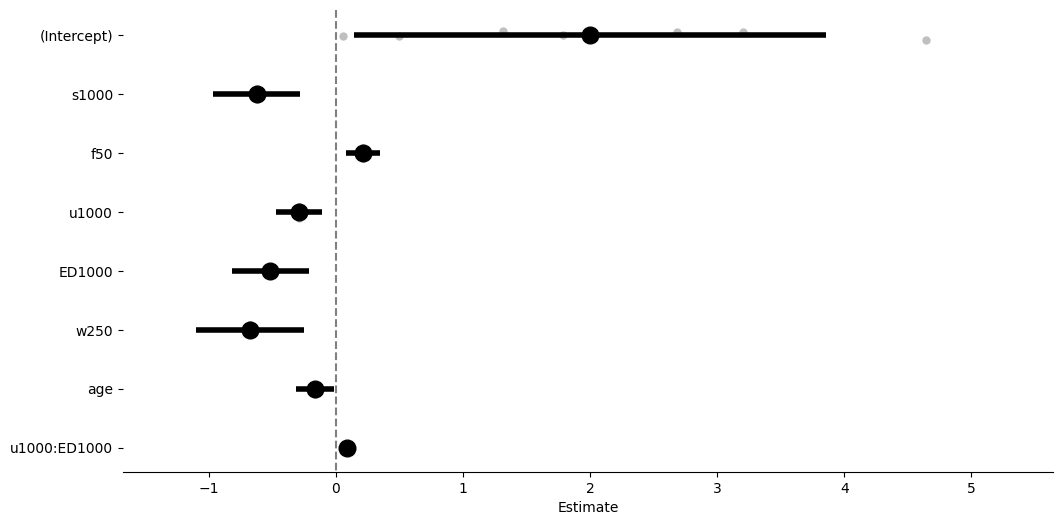

In [297]:
glmm.plot_summary( )

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


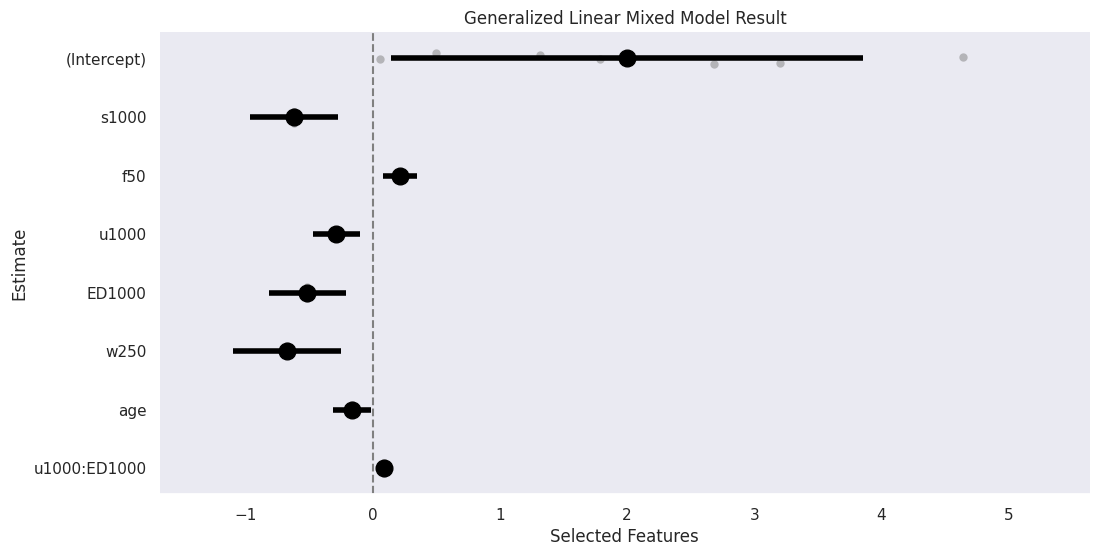

In [303]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Generate the plot
glmm_plot = glmm.plot_summary()

# Customize the plot
plt.title('Generalized Linear Mixed Model Result')
plt.xlabel('Selected Features')
plt.ylabel('Estimate')

# Show the plot
plt.show()


In [305]:
glmm.data.head()

,Year,distance,y,w50,u50,s50,f50,h50,w250,u250,...,PD50,PD250,PD1000,E,yrs_alive,age,Temp_Classes,distance_dicho,residuals,fits
0,2018,365.980498,0.0,0.0,6.465116,0.953488,0.034884,2.546512,0.0,4.098201,...,2.428663,2.367136,4.06248,1,1,2,3.0,1,-0.418188,0.083727
1,2022,365.980498,0.0,0.0,6.465116,0.953488,0.034884,2.546512,0.0,4.098201,...,2.428663,2.367136,4.06248,1,3,4,3.0,1,-1.811844,0.806289
2,2017,365.980498,0.0,0.0,6.465116,0.953488,0.034884,2.546512,0.0,4.098201,...,2.428663,2.367136,4.06248,1,0,1,3.0,1,-0.366828,0.065068
3,2018,365.980498,0.0,0.0,6.465116,0.953488,0.034884,2.546512,0.0,4.098201,...,2.428663,2.367136,4.06248,1,0,1,3.0,1,-0.452207,0.097192
4,2019,365.980498,0.0,0.0,6.465116,0.953488,0.034884,2.546512,0.0,4.098201,...,2.428663,2.367136,4.06248,1,0,1,3.0,1,-0.812261,0.280993


In [239]:
## V2

from sklearn.preprocessing import StandardScaler

glmm = Lmer("y  ~ PD50*u50 + u1000*ED1000 + f50 + w250 + s250 + (1|Year) + (1|age)",
             data=dfu, family = 'binomial')

print(glmm.fit())

Model failed to converge with max|grad| = 0.0309981 (tol = 0.002, component 1) 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~PD50*u50+u1000*ED1000+f50+w250+s250+(1|Year)+(1|age)

Family: binomial	 Inference: parametric

Number of observations: 1213	 Groups: {'Year': 7.0, 'age': 6.0}

Log-likelihood: -577.146 	 AIC: 1178.292

Random effects:

             Name    Var    Std
Year  (Intercept)  2.562  1.601
age   (Intercept)  0.090  0.299

No random effect correlations specified

Fixed effects:

              Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)      0.070  -2.131    2.271  1.123  1.072      0.119       9.688   
PD50             0.497   0.098    0.896  0.204  1.644      1.103       2.450   
u50              0.117  -0.020    0.253  0.070  1.124      0.980       1.288   
u1000           -0.262  -0.456   -0.068  0.099  0.770      0.634       0.934   
ED1000          -0.459  -0.762   -0.156  0.155  0.632      0.467       0.855 

/usr/local/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


In [240]:
## V1

from sklearn.preprocessing import StandardScaler

glmm = Lmer("y  ~ PD50*u50 + u1000*ED1000 + f50 + w250 + s250 + (1|Year)",
             data=dfu, family = 'binomial')

print(glmm.fit())

Model failed to converge with max|grad| = 0.00739157 (tol = 0.002, component 1) 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~PD50*u50+u1000*ED1000+f50+w250+s250+(1|Year)

Family: binomial	 Inference: parametric

Number of observations: 1213	 Groups: {'Year': 7.0}

Log-likelihood: -581.712 	 AIC: 1185.424

Random effects:

             Name    Var    Std
Year  (Intercept)  2.313  1.521

No random effect correlations specified

Fixed effects:

              Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)      0.107  -2.038    2.252  1.094  1.113      0.130       9.506   
PD50             0.508   0.114    0.903  0.201  1.663      1.121       2.467   
u50              0.108  -0.027    0.243  0.069  1.114      0.973       1.275   
u1000           -0.239  -0.431   -0.047  0.098  0.787      0.650       0.954   
ED1000          -0.425  -0.726   -0.124  0.154  0.653      0.484       0.883   
f50              0.223   0.045    0.402  0.091  

/usr/local/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


In [242]:
print(glmm.AIC)

1185.4239289328912


In [243]:
print(glmm.logLike)

-581.7119644664456


# section exploration

## PCA

In [ ]:
pip install bioinfokit

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster

In [ ]:
target = df['yrs_alive'].to_numpy()
PCA_X = df.drop(columns={'y','E','yrs_alive','age'})

X_st =  StandardScaler().fit_transform(PCA_X)
pca_out = PCA().fit(X_st)

# component loadings
loadings = pca_out.components_
loadings

# get eigenvalues (variance explained by each PC)
pca_out.explained_variance_


# get biplot
pca_scores = PCA().fit_transform(X_st)

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=PCA_X.columns.values,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

xs = pca_scores[:,0]
ys = pca_scores[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

fig, ax = plt.subplots(figsize=(20, 10))

for i, feature in enumerate(PCA_X.columns):
    # if feature.startswith("autumn_"):
        ax.arrow(0, 0, pca_out.components_[0, i],
                 pca_out.components_[1, i],
                 head_width=0.03,
                 head_length=0.03)
        ax.text(pca_out.components_[0, i] * 1.15,
                pca_out.components_[1, i] * 1.15,
                feature, fontsize = 14, alpha=0.7)

scatter = ax.scatter(xs * scalex,ys * scaley,
                     c=target,
                     cmap='plasma',alpha=0.2)


ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
# ax.set_title('Figure 3', fontsize=20)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Alive")
ax.add_artist(legend1)

plt.figure()

## matlab export

In [ ]:
break

In [ ]:
# matdf = df.drop(columns={'ColonyID','HiveID','Year','Status','NDVI_mean','geometry','c','c50','c250','c1000','c2500'})

matdf = df.drop(columns={'ds','globalid','health','note','resources','brood','tag_serial_number','grade','ColonyID','report_submitted_at','category','action_detail','is_alive','HiveID','Year','Status','NDVI_mean','geometry','NDVI_mean','c','predicted_status'}, errors='ignore')

In [ ]:
matdf.columns

In [ ]:
X = matdf.drop(columns='status_binary')  # feature x columns
y = matdf[['status_binary']]  # target y binary column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55555)

# shapes of sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


In [ ]:
y = y_train.values
y_test = y_test.values
X = X_train.values
X_test = X_test.values

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# NaN values check
matdf.isna().any()

In [ ]:
# change directory to local and save .matfile

import scipy.io
import os

os.chdir('/content')


data_dict = {
    'X': X,
    'y': y,
    'X_test': X_test,
    'y_test': y_test
}

# export to a MATLAB .mat file
scipy.io.savemat('02-08.mat', data_dict)

In [ ]:
# change directory back to Google Drive
#os.chdir('/content/drive/MyDrive')

## Variable exploration

## effet de config

In [ ]:
import pandas as pd

df_test = df.copy()
# Define number of bins or percentiles
custom_bins = [0, 0.10, 0.25, 0.5, float('inf')]  # Define your custom thresholds here

# Create bins for df_test
df_test['h1000_bins'] = pd.cut(df_test['h1000'], bins=custom_bins, labels=False, include_lowest=True)

# Plot partial regression plot using df_test
sns.lmplot(x='ED1000', y='y', hue='h1000_bins', data=df_test, scatter_kws={'alpha':0.5}, palette='viridis')
plt.xlabel('ED1000')
plt.ylabel('y')
plt.title('Partial Regression Plot of y vs. ED1000 stratified by custom h1000 bins (using df_test)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each unique bin
for bin_value in df_test['h1000_bins'].unique():
    # Filter data for the current bin
    df_bin = df_test[df_test['h1000_bins'] == bin_value]

    # Plot partial regression plot for the current bin
    sns.lmplot(x='ED1000', y='y', data=df_bin, scatter_kws={'alpha':0.5})
    plt.xlabel('ED1000')
    plt.ylabel('y')
    plt.title(f'Partial Regression Plot of y vs. ED1000 for h1000 bin {bin_value}')
    plt.show()


In [ ]:
df_test.describe()

In [ ]:
df_test['v1000'] = (df_test['h1000'] + df_test['f1000'])

### Lowess and ROC curves

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat['y'], concat['distance'])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel('Distance')
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

col = 'distance'

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat['distance'])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

col = '50u'

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat['y'], concat[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

col = '250u'

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat['y'], concat[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

col = '2500u'

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat['y'], concat[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '50f'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '250f'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '2500f'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

col = '50h'

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat['y'], concat[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '250h'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '2500h'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '50s'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '250s'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '2500s'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '1000hf_ED'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

col = '1000hf_PD'

# Remove zero values from '50f' column
concat_nonzero = concat[concat[col] != 0]

# Fit Loess curve to the data
loess_smoothed = sm.nonparametric.lowess(concat_nonzero['y'], concat_nonzero[col])

# Plot scatter plot with Loess curve
plt.figure(figsize=(10, 6))
sns.scatterplot(x=col, y='y', data=concat, color='b', alpha=0.5, label='Data')
plt.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='r', label='Loess Smoothed')
plt.xlabel(col)
plt.ylabel('y')
plt.title('Scatter Plot with Loess Smoothed Curve (excluding zero values)')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[col])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {col} and Y')
plt.legend(loc="lower right")
plt.show()


roc auc

### Youden dichomotizer

In [ ]:
concat

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
c = 'Temp_Classes'

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[c])

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {c} and Y')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(concat['y'], concat[c])

# Calculate sensitivity and specificity
sensitivity = tpr
specificity = 1 - fpr

# Calculate Youden Index
youden_index = sensitivity + specificity - 1

# Find threshold that maximizes Youden Index
best_threshold_idx = np.argmax(youden_index)
best_threshold = thresholds[best_threshold_idx]
# best_threshold = 15

# Dichotomize the 'distance' variable based on the selected threshold
concat[f'{c}_dicho'] = (concat[c] >= best_threshold).astype(int)

# Print the selected threshold and the number of observations in each group
print("Selected threshold (Youden Index):", best_threshold)
print("Number of observations in each group:")
print(concat[f'{c}_dicho'].value_counts())

In [ ]:
# proportion of variable for y reports
proportion_y1 = concat.groupby(f'{c}_dicho')['y'].mean()

print(proportion_y1)


In [ ]:
dfu['distance_dicho'] = (dfu['distance'] <= 200).astype(int)
# proportion of variable for y reports
proportion_y1 = dfu.groupby(f'{c}_dicho')['y'].mean()

print(proportion_y1)

In [ ]:
concat.drop(columns=f'{c}_dicho',inplace=True, errors='ignore')

In [ ]:
# import statsmodels.api as sm
# from sklearn.metrics import roc_auc_score

# # Step 1: Define the features (predictor variables) and the target variable
# X = concat.drop(columns={'y','distance','Temp_Classes'})  # Features (predictor variables)
# y = concat['y']  # Target variable

# # Initialize variables to store best model information
# best_roc_auc = 0
# best_selected_features = None

# # Define a function to fit a logistic regression model and compute ROC AUC
# def fit_logit_model(features):
#     logit_model = sm.Logit(y, sm.add_constant(X[features]))  # Add a constant term for the intercept
#     result = logit_model.fit()

#     # Predict probabilities and compute ROC AUC
#     y_prob = result.predict()
#     roc_auc = roc_auc_score(y, y_prob)

#     return result, roc_auc

# # Perform forward stepwise variable selection
# selected_features = []  # Initialize list of selected features

# while len(selected_features) < len(X.columns):  # Continue until all features have been selected
#     best_roc_auc_for_iteration = 0
#     best_feature_for_iteration = None

#     # Iterate through each candidate feature
#     for feature in X.columns:
#         if feature not in selected_features:  # Skip features already selected
#             # Fit a logistic regression model with the additional feature
#             new_features = selected_features + [feature]
#             model, roc_auc = fit_logit_model(new_features)

#             # Update best feature if ROC AUC is higher
#             if roc_auc > best_roc_auc_for_iteration:
#                 best_roc_auc_for_iteration = roc_auc
#                 best_feature_for_iteration = feature

#     # Add the best feature to the list of selected features
#     selected_features.append(best_feature_for_iteration)

#     # Update best model information if ROC AUC is higher
#     if best_roc_auc_for_iteration > best_roc_auc:
#         best_roc_auc = best_roc_auc_for_iteration
#         best_selected_features = selected_features.copy()

#     # Print information about the selected feature
#     print("Selected feature:", best_feature_for_iteration)
#     print("ROC AUC:", best_roc_auc_for_iteration)
#     print()

# # Step 2: Fit the final logistic regression model using the best selected features
# final_model, final_roc_auc = fit_logit_model(best_selected_features)

# # Step 3: Print model summary
# print(final_model.summary())
# print("Final ROC AUC:", final_roc_auc)


In [ ]:
# # optional drop (2500 composition)
# concat = concat.drop(columns={'2500u','2500f','2500h','2500s','2500w'},errors='ignore')

### Road effect, immediate distance

In [ ]:
# effet de la distance critique d'une route

(dfu[dfu['distance'] <= 20])['y'].value_counts()




In [ ]:
concat.groupby(f'{c}_dicho')['y'].mean()

## Survival analysis

In [ ]:
break

In [ ]:
!pip install lifelines


In [ ]:
import lifelines
from lifelines import CoxPHFitter

### Cox PH, à continuer ici

In [ ]:
# df[cperc] = df[cperc] / 10

In [ ]:
df.describe()

In [ ]:
df.head(n=25)

In [ ]:
from lifelines import CoxPHFitter
import pandas as pd

# update concat to df
df = concat.drop(columns=['geometry'])
# Extracting features, durations, and event indicators
X = df.drop(columns={'y','yrs_alive','E'})
T = df['yrs_alive']
E = df['E']

# Initialize the Cox PH model
coxph = CoxPHFitter()

# Fit the Cox PH model
coxph.fit(df, duration_col='yrs_alive', event_col='E', formula='distance_dicho + s50 + u250 + s1000 + w250 + ED1000', strata=['age'])

# Print the summary of the Cox PH model
coxph.print_summary()


In [ ]:
df.describe()

In [ ]:
from lifelines.statistics import logrank_test
results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)

results.print_summary()
print(results.p_value)        # 0.7676
print(results.test_statistic) # 0.0872

In [ ]:
coxph.check_assumptions(df, p_value_threshold=0.05, show_plots=True)

In [ ]:
from lifelines.statistics import proportional_hazard_test

results = proportional_hazard_test(coxph, df, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.show()

In [ ]:
df.columns

In [ ]:
import math

# Given coefficient
coef = 0.09

# Number of units increased
increase = 5

# Calculate hazard ratio for a one-unit increase
hazard_ratio_one_unit = math.exp(coef)

# Calculate hazard ratio for a 5-unit increase
hazard_ratio_five_units = hazard_ratio_one_unit ** increase

# Print the result
print("Hazard ratio for a 5-unit increase:", hazard_ratio_five_units)


### Random Survival Forests

In [ ]:
!pip install scikit-survival

In [ ]:
df['E'].value_counts()

In [ ]:
df['E']

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
import sksurv
from sklearn.model_selection import GridSearchCV

In [ ]:
rfcol = ['distance','50u','50s','1000s','1000u','50hf_ED','50hf_PD','250hf_ED','250hf_PD','1000hf_ED','1000hf_PD','Temp_Classes']

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn import set_config

%matplotlib inline

# update concat to df
df = concat.drop(columns=['geometry'])

# Extract survival time and event indicator
T = df['yrs_alive']
E = df['E']

# Extract features
X = df[rfcol]

# Combine 'Years' and 'E' into a structured array for survival analysis
y = Surv.from_arrays(E, T)

# Initialize the Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, max_depth=10, min_samples_leaf=2)
rsf.fit(X,y)

# Fit the Random Survival Forest model
# score = calculate_concordance_index(rfcol)
# score
rsf.score(df[rfcol], Surv.from_arrays(E, T))

In [ ]:
rsf.predict(X)

In [ ]:
np.arange(20,501,60)

In [ ]:
np.arange(2,12,2)

In [ ]:
# parameters = {'n_estimators':np.arange(10,601,60), 'max_depth':np.arange(2,32,4), 'min_samples_leaf':np.arange(2,12,2) }
# rsf = RandomSurvivalForest(random_state=0, bootstrap = True)
# rsf_gs= GridSearchCV(rsf, parameters, cv=5, return_train_score=True, n_jobs=-1)
# rsf_gs.fit(X, y)
# rsf_gs.best_params_

In [ ]:
rsf_gs.score(X, y)

In [ ]:
# from sksurv.ensemble import RandomSurvivalForest
# from sksurv.util import Surv
# import pandas as pd

# # Assuming 'df' is your DataFrame containing the data
# # 'Years' contains the survival time, 'E' contains the event indicator,
# # and 'X' contains the features

# # Extract survival time and event indicator
# T = df['yrs_alive']
# E = df['E']

# # Initialize an empty list to store selected features
# selected_features = []

# # Define a function to calculate the concordance index for a given set of features
# def calculate_concordance_index(features):
#     rsf = RandomSurvivalForest()
#     rsf.fit(df[features], Surv.from_arrays(E, T))
#     return rsf.score(df[features], Surv.from_arrays(E, T))

# X = df.drop(columns=['yrs_alive', 'y', 'E'])
# # Forward stepwise variable selection
# remaining_features = list(X.columns)
# best_score = 0.0

# while remaining_features:
#     scores = []
#     for feature in remaining_features:
#         score = calculate_concordance_index(selected_features + [feature])
#         scores.append((feature, score))

#     # Select the feature with the highest score
#     best_feature, best_score_for_feature = max(scores, key=lambda x: x[1])

#     # If adding the best feature improves the model, include it in selected features
#     if best_score_for_feature > best_score:
#         selected_features.append(best_feature)
#         remaining_features.remove(best_feature)
#         best_score = best_score_for_feature
#     else:
#         break

# print("Selected features:", selected_features)


In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
import pandas as pd

# update concat to df
df = concat.drop(columns=['geometry'])

# Extract survival time and event indicator
T = df['yrs_alive']
E = df['E']

# Extract selected features
X = df[selected_features]

# Combine 'E' and 'T' into a structured array for survival analysis
y = Surv.from_arrays(E, T)

# Initialize the Random Survival Forest model
rsf = RandomSurvivalForest()

# Fit the Random Survival Forest model
rsf.fit(X, y)

# Calculate the concordance index
concordance_index = rsf.score(X, y)
print("Concordance Index:", concordance_index)

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
import pandas as pd

# Assuming 'concat' is your DataFrame containing the data
# 'yrs_alive' contains the survival time, 'E' contains the event indicator,
# and 'selected_features' contains the selected features from variable selection

# update concat to df
df = concat.drop(columns=['geometry'])

# Extract survival time and event indicator
T = df['yrs_alive']
E = df['E']

# Extract selected features
X = df[selected_features]

# Combine 'E' and 'T' into a structured array for survival analysis
y = Surv.from_arrays(E, T)

# Initialize the Random Survival Forest model
rsf = RandomSurvivalForest()

# Fit the Random Survival Forest model
rsf.fit(X, y)

# Calculate the concordance index
concordance_index = rsf.score(X, y)
print("Concordance Index:", concordance_index)

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
import pandas as pd

# Assuming 'concat' is your DataFrame containing the data
# 'yrs_alive' contains the survival time, 'E' contains the event indicator,
# and 'selected_features' contains the selected features from variable selection

# update concat to df
df = concat.drop(columns=['geometry'])

# Extract survival time and event indicator
T = df['yrs_alive']
E = df['E']

# Extract selected features
X = df.drop(columns={'y','E','yrs_alive'})

# Combine 'E' and 'T' into a structured array for survival analysis
y = Surv.from_arrays(E, T)

# Initialize the Random Survival Forest model
rsf = RandomSurvivalForest(random_state=0)

# Fit the Random Survival Forest model
rsf.fit(X, y)

# Calculate the concordance index
concordance_index = rsf.score(X, y)
print("Concordance Index:", concordance_index)

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

random_state = 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

result = permutation_importance(rsf, X_test, y_test, n_repeats=15, random_state=random_state)

In [ ]:
rsf.score(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

# Predict survival probabilities for test data
survival_probabilities = rsf.predict_survival_function(X_test)

# Plot survival functions for a few subjects
num_subjects_to_plot = 10  # Adjust the number of subjects to plot as needed
for i in range(num_subjects_to_plot):
    plt.step(
        survival_probabilities[i].x,
        survival_probabilities[i].y,
        where='post',
        label=f'Subject {i+1}'
    )

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Survival Functions')
plt.legend()
plt.show()


In [ ]:
pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)

## ml models

### logit model

In [ ]:
import statsmodels.api as sm

In [ ]:
concat.describe()

In [ ]:
# concat[cperc] = concat[cperc] / 10

In [ ]:
# # divide percentages by 10 so that in logit the effect is by 10 % steps
# if div == 1:
#   print('div deja faite')
# else:
#   concat[cperc] = concat[cperc] / 10
#   div = 1

In [ ]:
c4l = ['50u','250w','1000s']

In [ ]:
# # Step 1: Define the features (predictor variables) and the target variable
# X = concat.drop(columns={'y'})  # Features (predictor variables)
# y = concat['y']  # Target variable

# # Step 2: Fit the logistic regression model using all the data
# logit_model = sm.Logit(y, sm.add_constant(X))  # Add a constant term for the intercept
# result = logit_model.fit(maxiter=1000)

# # Step 3: Print model summary
# print(result.summary())

In [ ]:
# Step 1: Define the features (predictor variables) and the target variable
X = concat[c4l]  # Features (predictor variables)
y = concat['y']  # Target variable

# Step 2: Scale the features using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 3: Fit the logistic regression model using all the data
logit_model = sm.Logit(y, sm.add_constant(X))  # Add a constant term for the intercept
result = logit_model.fit()

# Step 4: Print model summary
print(result.summary())


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score

# Step 1: Define the features (predictor variables) and the target variable
X = concat.drop(columns={'y'})  # Features (predictor variables)
y = concat['y']  # Target variable

# Initialize variables to store best model information
best_roc_auc = 0
best_selected_features = None

# Define a function to fit a logistic regression model and compute ROC AUC
def fit_logit_model(features):
    logit_model = sm.Logit(y, sm.add_constant(X[features]))  # Add a constant term for the intercept
    result = logit_model.fit()

    # Predict probabilities and compute ROC AUC
    y_prob = result.predict()
    roc_auc = roc_auc_score(y, y_prob)

    return result, roc_auc

# Perform forward stepwise variable selection
selected_features = []  # Initialize list of selected features

while len(selected_features) < len(X.columns):  # Continue until all features have been selected
    best_roc_auc_for_iteration = 0
    best_feature_for_iteration = None

    # Iterate through each candidate feature
    for feature in X.columns:
        if feature not in selected_features:  # Skip features already selected
            # Fit a logistic regression model with the additional feature
            new_features = selected_features + [feature]
            model, roc_auc = fit_logit_model(new_features)

            # Update best feature if ROC AUC is higher
            if roc_auc > best_roc_auc_for_iteration:
                best_roc_auc_for_iteration = roc_auc
                best_feature_for_iteration = feature

    # Add the best feature to the list of selected features
    selected_features.append(best_feature_for_iteration)

    # Update best model information if ROC AUC is higher
    if best_roc_auc_for_iteration > best_roc_auc:
        best_roc_auc = best_roc_auc_for_iteration
        best_selected_features = selected_features.copy()

    # Print information about the selected feature
    print("Selected feature:", best_feature_for_iteration)
    print("ROC AUC:", best_roc_auc_for_iteration)
    print()

# Step 2: Fit the final logistic regression model using the best selected features
final_model, final_roc_auc = fit_logit_model(best_selected_features)

# Step 3: Print model summary
print(final_model.summary())
print("Final ROC AUC:", final_roc_auc)


### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define the features (predictor variables) and the target variable
X = concat.drop(columns={'y','geometry','E','yrs_alive'})  # Features (predictor variables)
y = concat['y']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 3: Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=100, random_state=1)
rf_classifier.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 6: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
variable_importances = rf_classifier.feature_importances_

# Step 5: Create a DataFrame to display variable importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': variable_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print variable importances
print(importance_df)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import classification_report, accuracy_score

# # Step 1: Define the features (predictor variables) and the target variable
# X = concat.drop(columns={'y'})  # Features (predictor variables)
# y = concat['y']  # Target variable

# # Step 2: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# # Step 3: Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Step 4: Initialize Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=1)

# # Step 5: Perform grid search
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Step 6: Get the best parameters and the best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Step 7: Predict on the test set using the best model
# y_pred = best_model.predict(X_test)

# # Step 8: Evaluate the best model
# accuracy = accuracy_score(y_test, y_pred)
# print("Best Parameters:", best_params)
# print("Best Model Accuracy:", accuracy)

# # Step 9: Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))